<a href="https://colab.research.google.com/github/leandroaguazaco/data_science_portfolio/blob/main/Projects/01-NPS_Analysis/P01_NPS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> NPS ANALYSIS </h1>

<div align="center">

  <img alt="Static Badge" src="https://img.shields.io/badge/active_project-true-blue">

  <img alt="Static Badge" src="https://img.shields.io/badge/status-in progress-green">

</div>  

<object
data="https://img.shields.io/badge/contact-Felipe_Leandro_Aguazaco-blue?style=flat&link=https%3A%2F%2Fwww.linkedin.com%2Fin%2Ffelipe-leandro-aguazaco%2F">
</object>

The aim of this project is to analyze and evaluate customer service provided by a company based on historical information and customer service usage. The intended result is to provide a perspective or new viewpoint and offer insights for redesigning the customer experience area.

## a - Download and Install libraries

In [ ]:
!pip install --upgrade pip
!pip install pandas
!pip install -U numpy
#!pip install datatable
!pip install polars
!pip install xlsx2csv
!pip install tidypolars
!pip install pyjanitor
!pip install missingno
!pip install pyod # Python library for detecting anomalies in multivariate data.
!pip install prince # Python library for multivariate exploratory data analysis in Python

!pip install -U matplotlib #!pip install matplotlib==3.3
!pip install seaborn
!pip install plotly
!pip install colorama
!pip install adjustText

!pip install -U --pre pycaret #!python -m pip uninstall pycaret
# !pip install pycaret[full]
!pip install -U scikit-learn
!pip install scikit-optimize
!pip install xgboost
!pip install lightgbm
# !pip install mlflow
!pip install probatus

!pip install -U ydata-profiling

In [ ]:
!pip install pyjanitor
!pip install adjustText
!pip install colorama

In [ ]:
# !pip list -v

## b - Import libraries

In [ ]:
# Python Utilies

import pandas as pd # other libraries: datatable , polars, tidypolars
import polars as pl
import numpy as np
import warnings
from janitor import clean_names, remove_empty
from colorama import Fore, Style
import math

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from adjustText import adjust_text

# Outliers Detection
from pyod.models.ecod import ECOD
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# Impute missing values
from probatus.missing_values.imputation import ImputationSelector

# EDA and Autometed EDA
import missingno as msno
from ydata_profiling import ProfileReport
import prince # MCA

In [ ]:
# Machine learning

# import mlflow
import xgboost as xgb
import lightgbm as lgb

  ## PyCaret
from pycaret.classification import *
from pycaret.regression import *

  ## Sklearn
    ### Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
    ### Preporcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
    ### Models
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import BayesianRidge, Ridge
    ### Pipeline cache
from shutil import rmtree
from tempfile import mkdtemp

In [ ]:
# Setups

%matplotlib inline
plt.style.use("ggplot") # print(plt.style.available)
# sns.set_style(rc = {'axes.facecolor': 'gray'}) # Background color
# plt.style.use("seaborn-v0_8-colorblind")
pd.options.plotting.backend = "plotly"
pio.templates.default = "ggplot2"
# pio.templates
warnings.simplefilter("ignore")

## c - Load data

In [ ]:
# Data set 1
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_indicadores_df  = pl.read_excel(source = "Encuesta_Indicadores.xlsx",
                                         sheet_name = "Sheet1",
                                         xlsx2csv_options = {"skip_empty_lines": True},
                                         read_csv_options ={"has_header": True,
                                                            "try_parse_dates": True, # Important
                                                            "encoding": "utf8"}) \
                            .to_pandas() \
                            .pipe(clean_names) \
                            .pipe(remove_empty) \
                            .set_index("id") \
                            .drop_duplicates()

"""
# Using pandas
encuesta_indicadores_df = pd.read_excel("Encuesta_Indicadores.xlsx",
                                        sheet_name = "Sheet1",
                                        header = 0 ,
                                        index_col = "id")
"""

print(f"{Fore.GREEN} {type(encuesta_indicadores_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta Indicadores: rows = {encuesta_indicadores_df.shape[0]}, columns = {encuesta_indicadores_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_indicadores_df.head().𝚝𝚘_string())
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta Indicadores: rows = 6638, columns = 16 


     fecha_meda      grupo_meda  nps_med fcr_cat  esfuerzo  satisfaccion_asesor  satisfaccion_general     tipo_nps             tipo_ces tipo_satu_asesor tipo_satu_general ticket_status                     problema               necesidad                      tipologia id_asesor
id                                                                                                                                                                                                                                                                                    
3971 2021-12-28  Whatsapp Hogar        7      Sí         7                  8.0                   4.0      Neutros  Ni Fácil ni Difícil       Satisfecho        Satisfecho          None            Cancelar servicio       Retiro definitivo            Atencion Al Cliente  Asesor_1
1682 2021-11-11  Whatsapp Hogar        9      Sí         7

In [ ]:
# Data set 2
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_df = pl.read_excel(source = "Encuesta.xlsx",
                            sheet_name = "Sheet1",
                            xlsx2csv_options = {"skip_empty_lines": True},
                            read_csv_options ={"has_header": True,
                                               "try_parse_dates": True, # Important
                                               "encoding": "utf8"}) \
                .to_pandas() \
                .pipe(clean_names) \
                .pipe(remove_empty)  \
                .set_index("id_transaccion") \
                .drop_duplicates()

print(f"{Fore.GREEN} {type(encuesta_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta: rows = {encuesta_df.shape[0]}, columns = {encuesta_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_df.head().to_string())
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta: rows = 3719, columns = 2 


                   polaridad call_center_comentario_ltr
id_transaccion                                         
1                   POSITIVO          información clara
2               MUY POSITIVO  buena atención y asesoría
3               MUY POSITIVO              buena atencio
4                   NEGATIVO               muy demorado
5               MUY POSITIVO             buena atención


CPU times: user 216 ms, sys: 4.37 ms, total: 220 ms
Wall time: 225 ms


## d - Types conversion and reduce memory usage

### d.1 - Function types conversions

In [ ]:
# dtypes conversion and memory reduce function.

def dtype_conversion(df: pd.DataFrame = None, verbose: bool = True)-> pd.DataFrame:
    """
    Summary:
      Function to dtypes conversion and save reduce memory usage; takes a DataFrame as argument, returns DataFrame.
      For more details, visit: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd.
      The modifications include type casting for numerical and object variables.
    Parameters:
      df (pandas.DataFrame): DataFrame containing information.
      verbose (bool, default = True): If true, display results (conversions and warnings)
    Returns:
      pandas.DataFrame: original DataFrame with dtypes conversions
      Plot original dtypes status, variable warning due high cardinality, save memory usage, final dtypes status.
    """
    # 0- Original dtypes
    print(Fore.GREEN + "Input dtypes" + Style.RESET_ALL)
    print(df.dtypes)
    print("\n")
    print(Fore.RED + "High Cardinality: levels > 15" + Style.RESET_ALL)

    # 1- Original memory_usage in MB
    start_mem = df.memory_usage().sum() / 1024 ** 2

    # 2- Numeric Types
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int": # First 3 characters
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # 3- Categorical Types
    categorical = ["object"]
    for col in df.select_dtypes(exclude = ["int8", "int16", "int32", "int64", "float16", "float32", "float64", "datetime64[ns]"]):
        categories = list(df[col].unique())
        cat_len = len(categories)
        if cat_len >= 2 and cat_len < 15:
           df[col] = df[col].astype("category")
        else:
          # Print hight cardinality variables, amount of levels and a sample of 50 firts categories
          print(f"Look at: {Fore.RED + col + Style.RESET_ALL}, {cat_len} levels = {categories[:50]}")

    # 4- Final memory_usage in MB
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print("\n")
        print(f"{Fore.BLUE}Initial memory usage: {start_mem:.2f} MB{Style.RESET_ALL}")
        print(f"{Fore.BLUE}Memory usage decreased to {end_mem:.2f} MB ({ 100 * (start_mem - end_mem) / start_mem:.1f}% reduction){Style.RESET_ALL}")
        print("\n")
        print(Fore.GREEN + "Output dtypes" + Style.RESET_ALL)
        print(df.dtypes)
        print("\n")

    return df

### d.2 - Applying type conversion function

In [ ]:
# Types conversion Dataset 1: Encuenta Indicadores

%%time
dtype_conversion(encuesta_indicadores_df,
                 verbose = True)

Input dtypes
fecha_meda              datetime64[ns]
grupo_meda                    category
nps_med                           int8
fcr_cat                       category
esfuerzo                          int8
satisfaccion_asesor            float16
satisfaccion_general           float16
tipo_nps                      category
tipo_ces                      category
tipo_satu_asesor              category
tipo_satu_general             category
ticket_status                 category
problema                      category
necesidad                     category
tipologia                     category
id_asesor                     category
dtype: object


High Cardinality: levels > 15
Look at: problema, 22 levels = ['Cancelar servicio', 'Solicitudes y PQRs', 'Reconexiones y suspensiones', 'Dudas de factura', 'Inconformidad con cobros', 'Cobros de servicio adicional', 'Fallas en servicio', 'Detalles y cambio en facturación', 'Servicio soporte técnico', 'Modificaciones en servicio', 'Instalación de

In [ ]:
# Types conversion Dataset 2: Encuenta

%%time
dtype_conversion(encuesta_df,
                 verbose = True)

Input dtypes
polaridad                     category
call_center_comentario_ltr      object
dtype: object


High Cardinality: levels > 15
Look at: call_center_comentario_ltr, 3533 levels = ['información clara', 'buena atención y asesoría', 'buena atencio', 'muy demorado', 'buena atención', 'excelente', 'soluciono mi problema', 'buen servicio', 'atención buena', 'por la buena atención', 'excelente servicio', 'no me dieron solucion', 'se me dio la solución que necesitaba', 'el servicio', 'me hicieron esperar más de 30 minutos y no me solucionaron nada', 'buenas noches. me dijieron que en 48 me solucionaban lo de mi factura, y no fue así._x000D_\nsigo con el mismo inconveniente.', 'muy buen servicio', 'no es posible comunicarse con ustedes lo dejan en la linea y no dan respuesta  para algo tan elemental para ustedes como la factura', 'exelente', 'buena', 'atención rápida y satisfactoria', 'excelente atención', 'bien', 'es bueno', 'cuando no hay servicio por fallas no descuentan los días en

### d.3 - Final Conversions

In [ ]:
# Final conversions

# problema, necesidad and tipología variables do not exhibit cardinality problems
encuesta_indicadores_df = encuesta_indicadores_df.astype({"problema": "category",
                                                          "necesidad": "category",
                                                          "tipologia": "category",
                                                          "id_asesor": "category"})

print(Fore.GREEN + "Final dtypes" + Style.RESET_ALL)
print(encuesta_indicadores_df.dtypes)

Final dtypes
fecha_meda              datetime64[ns]
grupo_meda                    category
nps_med                           int8
fcr_cat                       category
esfuerzo                          int8
satisfaccion_asesor            float16
satisfaccion_general           float16
tipo_nps                      category
tipo_ces                      category
tipo_satu_asesor              category
tipo_satu_general             category
ticket_status                 category
problema                      category
necesidad                     category
tipologia                     category
id_asesor                     category
dtype: object


## e - Exploratory Data Analysis

### e.1 - Automated EDA

In [ ]:
# https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html

profile = ProfileReport(encuesta_indicadores_df, # DataFrame
                        title = "Exploratory Data Analysis - Encuesta Indicadores Data",
                        # minimal = True,
                        duplicates = None, # Hight memory consume
                        samples = None, # Not necessary
                        correlations ={"auto": {"calculate": False},
                                       "pearson": {"calculate": True}, # For numerical variales
                                       "spearman": {"calculate": True}, # Form nonnormal numerical variable
                                       "kendall": {"calculate": False},
                                       "phi_k": {"calculate": False},
                                       "cramers": {"calculate": True}} # For categorical to categorical variable: Cramer's V association coefficient, numerical to categorical: Cramer’s V association coefficient with the numerical variable discretized automatically.
)

In [ ]:
# Notebook widget from Pandas Profiling to visualize EDA, automated eda library.
profile.to_notebook_iframe()

In [ ]:
# Export automated EDA to html file, look up file in current directory
profile.to_file("EDA_Encuesta_Indicadores.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### e.2 - Manual EDA

#### e.2.1 - Python Built Functions

In [ ]:
def summary_stats(df: pd.DataFrame = None):
  """
  Summary:
    Using python built functions to summary a DataFrame: DataFrame Shape, memory usage, general information.
    Numerical statistics: count, mean, median, min max, std, quartiles, skewness and kurtosis.
    Categorical statistics: count, unique, top frequency.
    Datetime statistics: count, unique, top, frequency, first, last.
  Parameters:
    df (pandas.DataFrame): DataFrame.
  Return:
    Shows multiple levels of summary statistics.
  """
  # DataFrame Shape
  print(Fore.GREEN + "DataFrame Shape" + Style.RESET_ALL)
  print(f"Rows = {df.shape[0]}, Columns = {df.shape[1]}")
  print("\n")

  # DataFrame Shape Memory usage
  print(Fore.GREEN + "DataFrame Memory usage" + Style.RESET_ALL)
  print(f"Memory usage = {df.memory_usage().sum() / 1024 ** 2:.2f} MB")
  print("\n")

  # General Information
  print(Fore.GREEN + "General Information" + Style.RESET_ALL)
  print(df.info())
  print("\n")

  # Summary Statistics - Datetime Variables
  print(Fore.GREEN + "Summary Statistics - Datetime Variables" + Style.RESET_ALL)
  print(df.describe(include = ["datetime64[ns]"]).T.to_markdown())
  print("\n")

  # Summary Statistics - Numerical Variables
  print(Fore.GREEN + "Summary Statistics - Numerical Variables" + Style.RESET_ALL)
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())
  print("\n")

  # Summary Statistics - Categorical Variables
  print(Fore.GREEN + "Summary Statistics - Categorical Variables" + Style.RESET_ALL)
  df_sum_cat = df.describe(exclude = ["number", "datetime64[ns]"]).T
  df_sum_cat["prop_top"] = (df_sum_cat["freq"] / df_sum_cat["count"]).map(lambda x: round(x, 2))
  print(df_sum_cat.to_markdown())
  print("\n")

In [ ]:
# Summary statistics
summary_stats(encuesta_indicadores_df)

DataFrame Shape
Rows = 6638, Columns = 16


DataFrame Memory usage
Memory usage = 0.86 MB


General Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6638 entries, 3971 to 6493
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha_meda            6638 non-null   datetime64[ns]
 1   grupo_meda            6314 non-null   object        
 2   nps_med               6638 non-null   int64         
 3   fcr_cat               6638 non-null   object        
 4   esfuerzo              6638 non-null   int64         
 5   satisfaccion_asesor   6314 non-null   float64       
 6   satisfaccion_general  6562 non-null   float64       
 7   tipo_nps              6638 non-null   object        
 8   tipo_ces              6638 non-null   object        
 9   tipo_satu_asesor      6314 non-null   object        
 10  tipo_satu_general     6562 non-null   object        
 11  ticket_status      

In [ ]:
# Summary statistics from most important categorical variables' levesl:
encuesta_indicadores_df \
  .groupby("tipo_nps", as_index = False) \
  .agg(["count", "mean", "median", "min", "max", "std"]) \
  .stack() \
  .round(1)

nps_med  esfuerzo  satisfaccion_asesor  \
tipo_nps                                                     
Promotores  count    3689.0    3689.0               3509.0   
            mean        9.8       9.3                  9.5   
            median     10.0      10.0                 10.0   
            min         9.0       0.0                  0.0   
            max        10.0      10.0                 10.0   
            std         0.4       1.5                  1.4   
Detractores count    1845.0    1845.0               1760.0   
            mean        1.8       2.1                  2.5   
            median      0.0       0.0                  0.0   
            min         0.0       0.0                  0.0   
            max         6.0      10.0                 10.0   
            std         2.2       3.0                  3.3   
Neutros     count    1104.0    1104.0               1045.0   
            mean        7.7       7.4                  8.1   
            median      8.0       8.0                  8.0   
            min         7.0       0.0                  0.0   
            max         8.0      10.0                 10.0   
            std         0.5       2.1                  1.8   

                    satisfaccion_general  
tipo_nps                                  
Promotores  count                 3646.0  
            mean                     4.8  
            median                   5.0  
            min                      1.0  
            max                      5.0  
            std                      0.5  
Detractores count                 1821.0  
            mean                     1.9  
            median                   1.0  
            min                      1.0  
            max                      5.0  
            std                      1.3  
Neutros     count                 1095.0  
            mean                     4.1  
            median                   4.0  
            min                      1.0  
            max                      5.0  
            std                      0.7

In [ ]:
# Crosstab (Higher dimensional frequency tables, Burt table)

pd.crosstab(index = [encuesta_indicadores_df.tipo_nps, encuesta_indicadores_df.tipo_satu_general],
            columns = [encuesta_indicadores_df.tipo_satu_asesor, encuesta_indicadores_df.tipo_ces], # Aggregate column levels
            margins = True,
            margins_name = "Total",
            normalize = False) \
  .round(3)

tipo_satu_asesor                          Insatisfecho            \
tipo_ces                                   Muy Difícil Muy Fácil   
tipo_nps    tipo_satu_general                                      
Promotores  Insatisfecho                             3         0   
            Muy Insatisfecho                         8         0   
            Muy Satisfecho                           0        26   
            Ni Satisfecho Ni Insatisfecho            0         0   
            Satisfecho                               1         1   
Detractores Insatisfecho                            83         1   
            Muy Insatisfecho                      1019        15   
            Muy Satisfecho                           6         0   
            Ni Satisfecho Ni Insatisfecho           11         1   
            Satisfecho                               0         0   
Neutros     Insatisfecho                             4         0   
            Muy Insatisfecho                         1         0   
            Muy Satisfecho                           2         0   
            Ni Satisfecho Ni Insatisfecho            5         0   
            Satisfecho                               0         2   
Total                                             1143        46   

tipo_satu_asesor                                               \
tipo_ces                                  Ni Fácil ni Difícil   
tipo_nps    tipo_satu_general                                   
Promotores  Insatisfecho                                    0   
            Muy Insatisfecho                                0   
            Muy Satisfecho                                  5   
            Ni Satisfecho Ni Insatisfecho                   0   
            Satisfecho                                      1   
Detractores Insatisfecho                                    0   
            Muy Insatisfecho                                2   
            Muy Satisfecho                                  1   
            Ni Satisfecho Ni Insatisfecho                   0   
            Satisfecho                                      0   
Neutros     Insatisfecho                                    1   
            Muy Insatisfecho                                0   
            Muy Satisfecho                                  1   
            Ni Satisfecho Ni Insatisfecho                   1   
            Satisfecho                                      2   
Total                                                      14   

tipo_satu_asesor                          Ni Satisfecho Ni Insatisfecho  \
tipo_ces                                                    Muy Difícil   
tipo_nps    tipo_satu_general                                             
Promotores  Insatisfecho                                              1   
            Muy Insatisfecho                                          0   
            Muy Satisfecho                                            8   
            Ni Satisfecho Ni Insatisfecho                             8   
            Satisfecho                                               12   
Detractores Insatisfecho                                             69   
            Muy Insatisfecho                                         33   
            Muy Satisfecho                                           14   
            Ni Satisfecho Ni Insatisfecho                           113   
            Satisfecho                                               33   
Neutros     Insatisfecho                                              8   
            Muy Insatisfecho                                          2   
            Muy Satisfecho                                            6   
            Ni Satisfecho Ni Insatisfecho                            35   
            Satisfecho                                               24   
Total                                                               366   

tipo_satu_asesor                             

#### e.2.2 - Missing values

In [ ]:
# 1. Missing vales plot function - Seaborn engine

def missing_plot_seaborn(df: pd.DataFrame = None):
  """
  Summary:
    Built function to plot missing values and its proportions from a DataFrame, base on seaborrn engine.
  Parameters:
    df (pandas.DataFrame): DataFrame containing information
  Returns:
    Static barplot: proportion of missing values by variable.
    pandas.DataFrame: total and proportion of missing values by variable.
  """
  # Count missing values per variable
  missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                           "missing_values": df.isnull().sum(),
                                          "proportion_missing": round(df.isnull().mean(), 3)}) \
                        .sort_values(by = "missing_values", ascending = False) \
                        .reset_index()

  # Change columns name
  missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
  missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

  # Plotting missing values
  sns.set_palette(palette = "viridis") # Viridis pallete
  sns.barplot(data = missing_values_df,
              x = "proportion_missing",
              y = "variable",
              orient = "h",
              alpha = 0.85,
              edgecolor = "black")

  plt.title("Missing Values Proportion")
  plt.xlabel("Proportion")
  plt.ylabel("Variable")
  # plt.set_cmap('viridis') # It doesn't work
  plt.show()

  return print(missing_values_df.to_string())

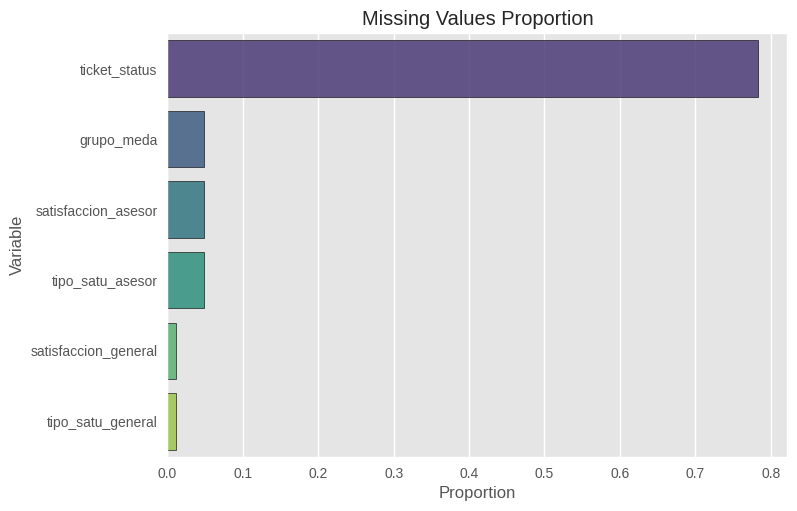

               variable     dtype  missing_values  proportion_missing
0         ticket_status  category            5197               0.783
1            grupo_meda  category             324               0.049
2   satisfaccion_asesor   float16             324               0.049
3      tipo_satu_asesor  category             324               0.049
4  satisfaccion_general   float16              76               0.011
5     tipo_satu_general  category              76               0.011


In [ ]:
# Missing values Data set 1:
missing_plot_seaborn(encuesta_indicadores_df)

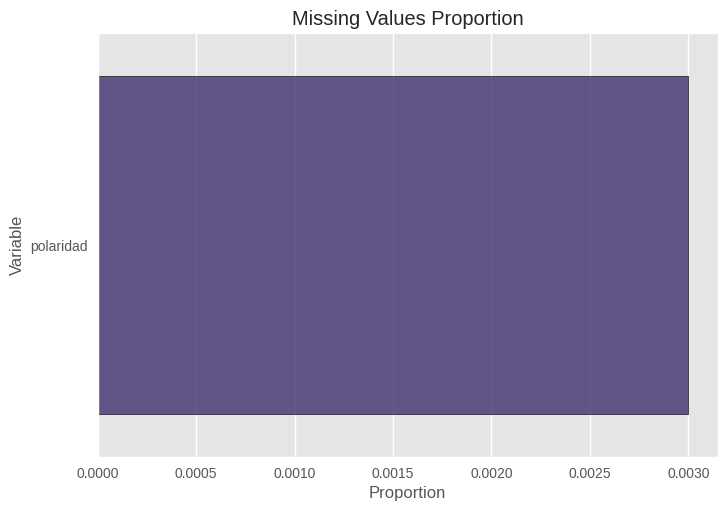

    variable     dtype  missing_values  proportion_missing
0  polaridad  category              13               0.003


In [ ]:
# Missing values Data set 2:
missing_plot_seaborn(encuesta_df)

In [ ]:
# 1. Missing vales plot function - Plotly engine
def missing_plot_plotly(df):
    """
    Summary:
      Built function to plot missing values and its proportions from a DataFrame, base on plotly engine.
    Parameters:
      df (pandas.DataFrame): DataFrame conteining information
    Returns:
      Interactive barplot: proportion of missing values by variable,
      pandas.Databframe: total and proportion of missing values by variable.
    """
    missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                             "missing_values": df.isnull().sum(),
                                             "proportion_missing": round(df.isnull().mean(), 3)}) \
                          .sort_values(by = "missing_values", ascending = True) \
                          .reset_index()


    # Change columns name
    missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
    missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

    fig = px.bar(data_frame = missing_values_df,
                y = "variable",
                x = "proportion_missing",
                color_discrete_sequence = px.colors.sequential.Viridis,

                # color = sample(px.colors.sequential.Viridis, missing_values_df.shape[0]),
                # color_discrete_map = "identity",
                # color_discrete_sequence = cm.get_cmap('viridis', 6)
                # color_continuous_scale =  px.colors.sequential.Viridis,
                # text_auto = True,

                orientation = 'h',
                width = 900,
                height = 500)

    fig.update_layout(title = {'text': "Missing Values Proportion",
                              'y': 0.95,
                              'x': 0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                      xaxis_title = "Proportion",
                      yaxis_title = "Variable")

    """
    fig.update_layout(legend_title = "Proportion",
                      showlegend = False)
    """

    fig.update_traces(marker_line_color = 'black')
    fig.show()

    return print(missing_values_df.sort_values(by = "missing_values", ascending = False).to_markdown())

In [ ]:
# Missing values Data set 1:
missing_plot_plotly(encuesta_indicadores_df)

|    | variable             | dtype    |   missing_values |   proportion_missing |
|---:|:---------------------|:---------|-----------------:|---------------------:|
| 15 | ticket_status        | category |             5197 |                0.783 |
| 12 | grupo_meda           | category |              324 |                0.049 |
| 13 | satisfaccion_asesor  | float16  |              324 |                0.049 |
| 14 | tipo_satu_asesor     | category |              324 |                0.049 |
| 10 | satisfaccion_general | float16  |               76 |                0.011 |
| 11 | tipo_satu_general    | category |               76 |                0.011 |


In [ ]:
# Missing values Data set 2:
missing_plot_plotly(encuesta_df)

|    | variable   | dtype    |   missing_values |   proportion_missing |
|---:|:-----------|:---------|-----------------:|---------------------:|
|  1 | polaridad  | category |               13 |                0.003 |


<Axes: >

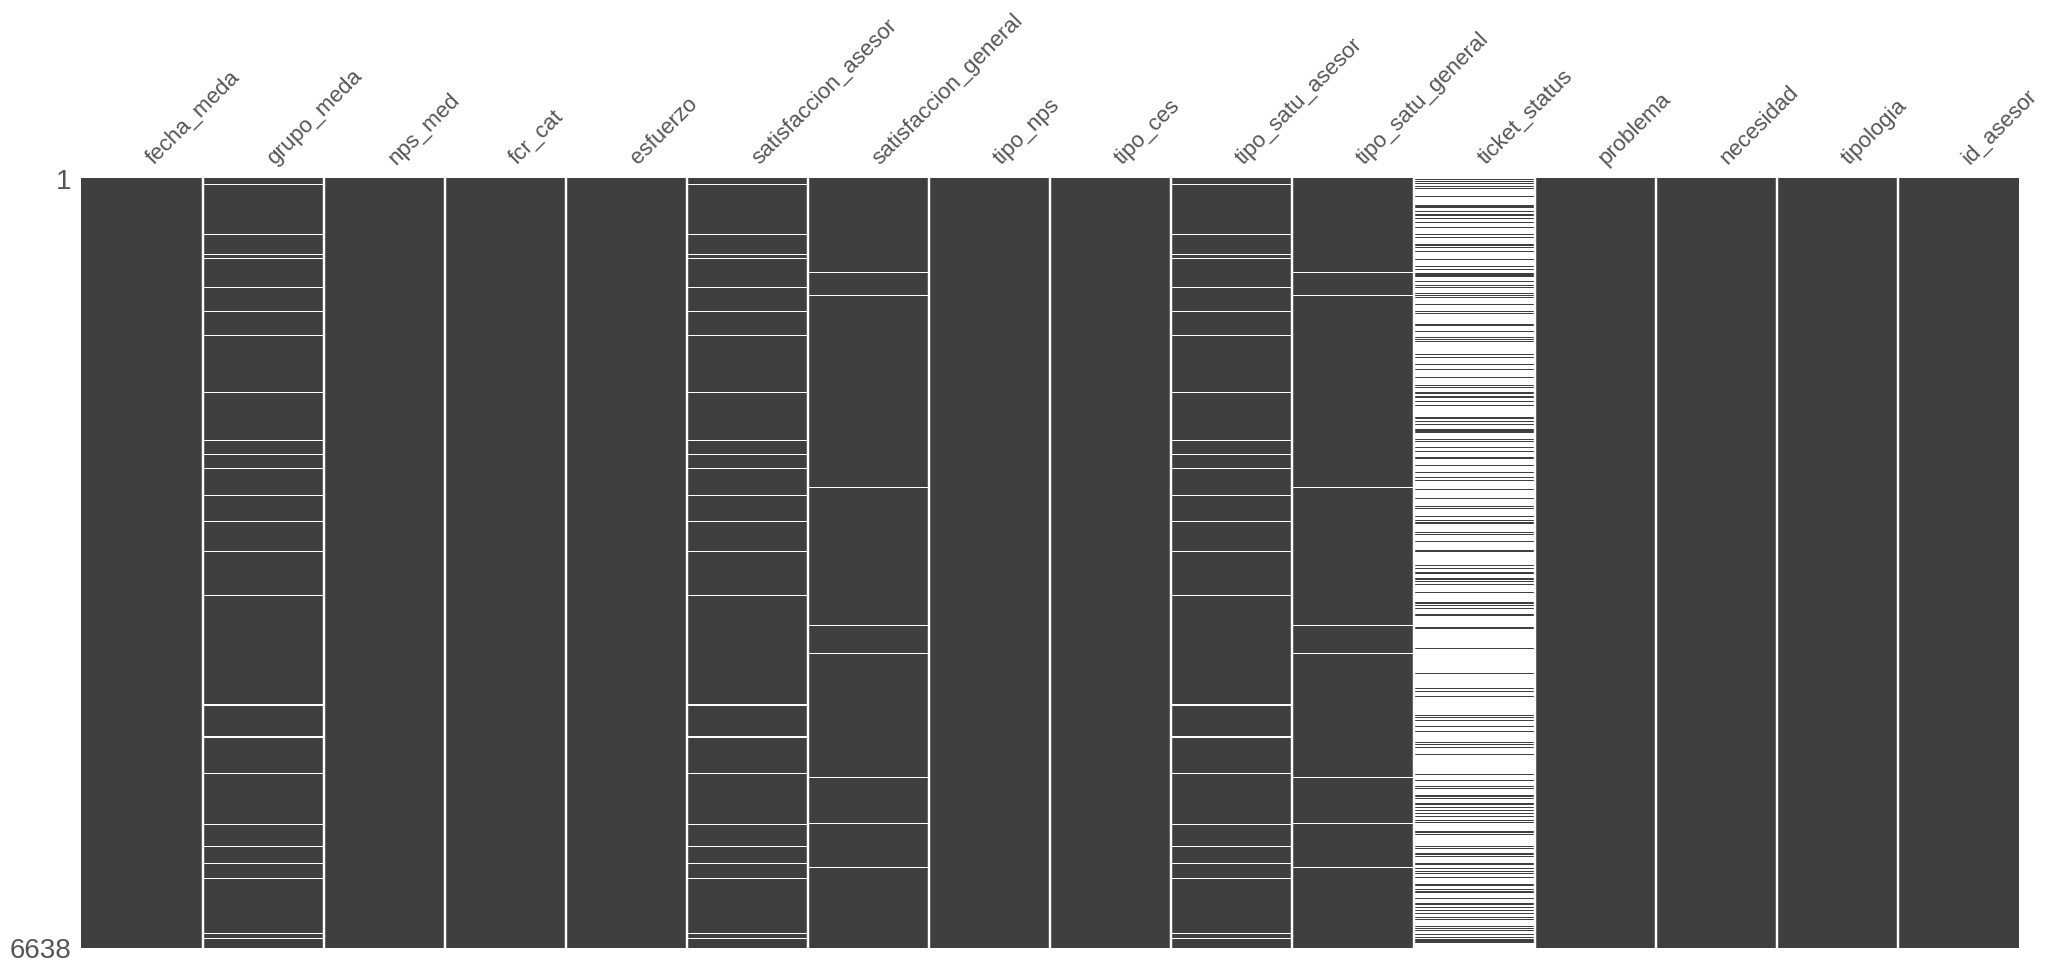

In [ ]:
# Pick out patterns in data completion.
msno.matrix(encuesta_indicadores_df,
            sparkline =  False)

At a glance, fecha_meda, nps_med, fcr_cat, esfuerzo, tipo_nps, tipo_ces, problema, tipologia and id_asesor appear to be completely populated, while geographic satisfaccion_general, tipo_status_general seems mostly complete, but spottier.The variable with the higher proportion of missing values is ticket_status (78.3%).

Text(0.5, 1.0, 'Nullity correlation ranges from -1 (if one variable appears, the other definitely does not) \n to 0 (variables appearing or not appearing have no effect on one another) \n to 1 (if one variable appears, the other definitely also does). \n')

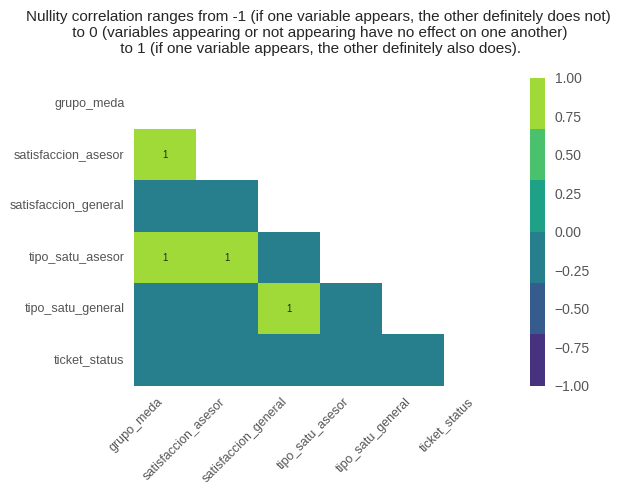

In [ ]:
# Missing values correlation heatmap

# Measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
msno.heatmap(encuesta_indicadores_df,
             fontsize = 9,
             cmap = sns.color_palette(palette = "viridis"), # Viridis pallete
             figsize = (6, 4))

plt.title("Nullity correlation ranges from -1 (if one variable appears, the other definitely does not) \n to 0 (variables appearing or not appearing have no effect on one another) \n to 1 (if one variable appears, the other definitely also does). \n",
          fontdict = {'fontsize': 11})

<Axes: >

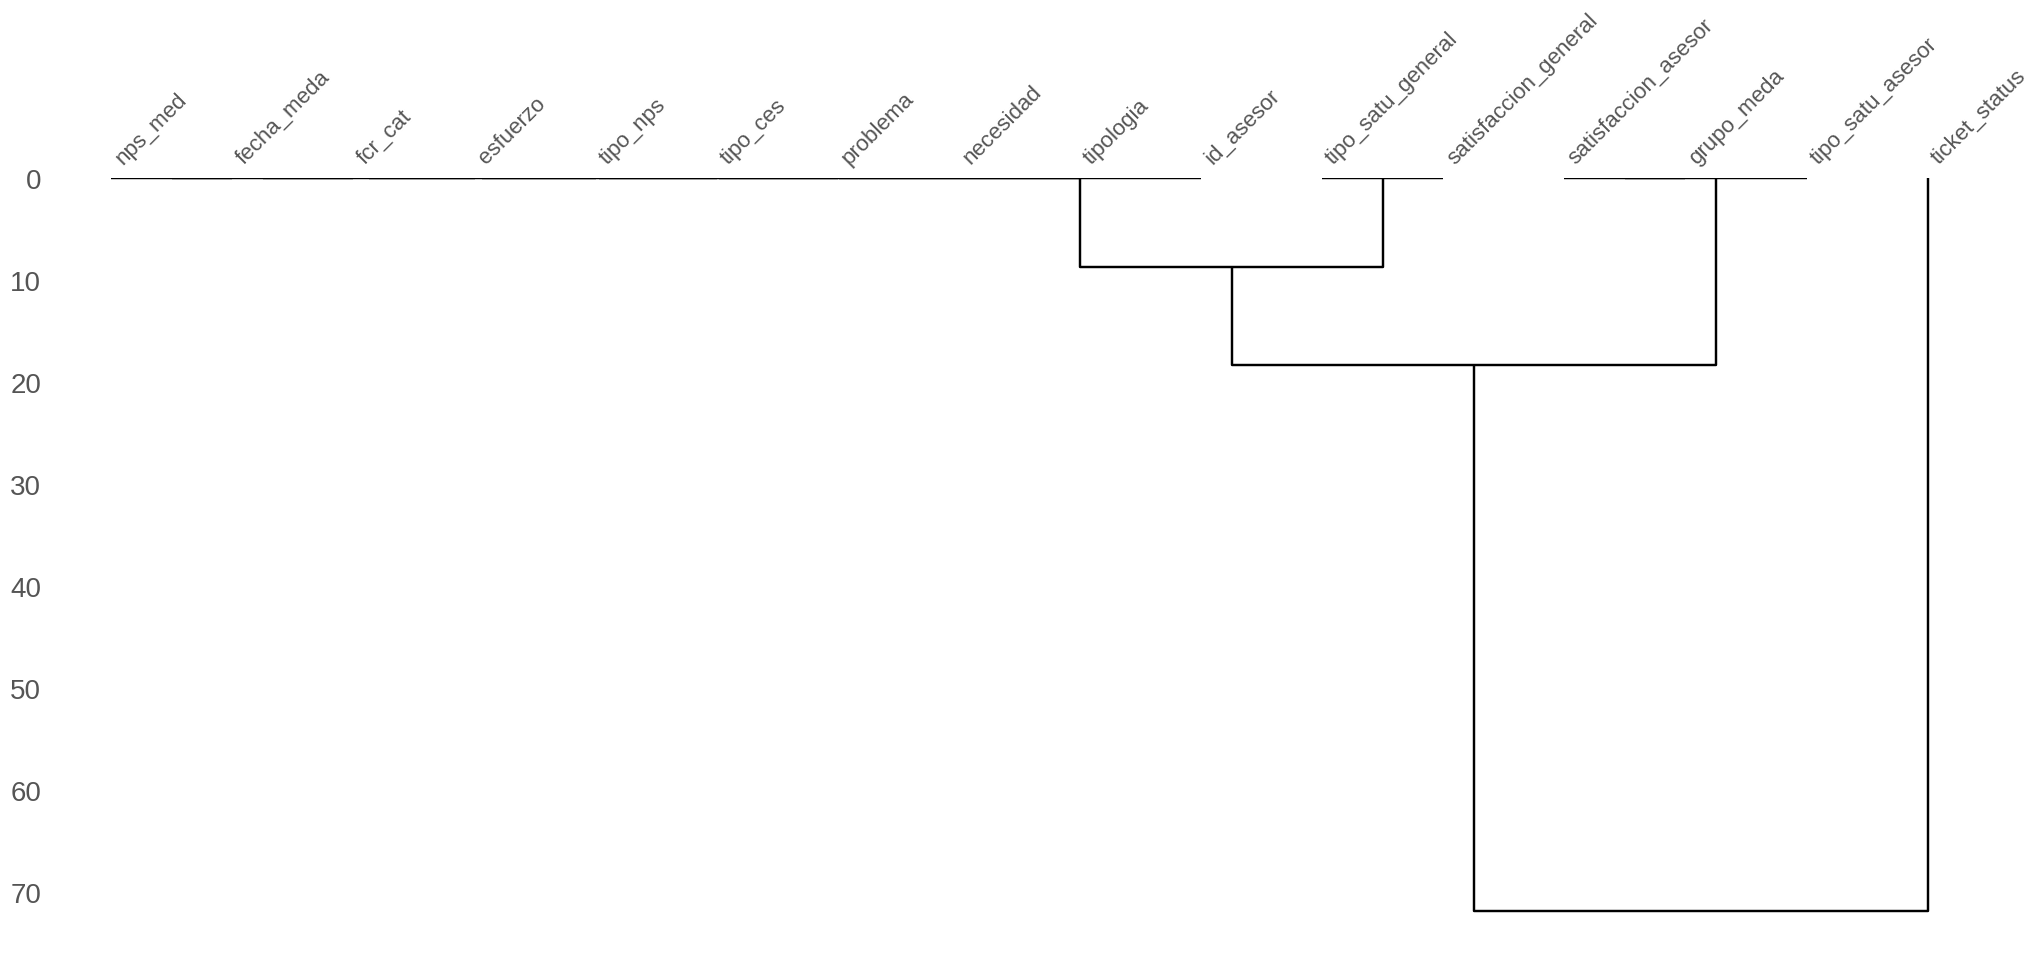

In [ ]:
# Dendograma of missing values relations

# Allows a more fully correlate variable completion.
# Using a hierarchical clustering algorithm to bin variables against one another by their nullity correlation.
# More detalis: https://github.com/ResidentMario/missingno
msno.dendrogram(encuesta_indicadores_df)

##### Missing values conclusions

**1 - Missingness types and variables**

* Missing completly at random (**MCAR**): ticket_status.

* Missing at random (**MAR**): none.

* Missing not at random (**MNAR**): <font color='blue'>tipo_satu_general - satisfaccion_general</font> and <font color='green'>satisfaccion_asesor - grupo_meda - tipo_satu_asesor</font>

**2 - Missing values processing**

* Dispense with ticket variable, i.e. delete variable.
* Impute the other variables.


In [ ]:
# Isolate and compare missing and complete values aside
# Delete variables: ticket_status

def num_summary_stat(df: pd.DataFrame = None):
  """
  Summary:
    Funcion to compute summary statistics from a DataFrame, include skewness and kurtosis.
  Parameters:
    df (pandas DataFrame, default = None): Dataset.
  Returns:
    Table, in markdown format, that contains summary statistics.
  """
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())

In [ ]:
# Original DataFrame, complete information
complete = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# DataFrame dropping NAs
no_missing = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).dropna()

# Summary Statistics - Numerical Variables
print(Fore.GREEN + "Original DF vs Without Missing Values DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
print("\n")
num_summary_stat(no_missing)
print("\n")

# Summary Statistics - Categorical Variables
print(Fore.GREEN + "Without Missing Values and Complete - Categorical Variables" + Style.RESET_ALL)
print(complete.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())
print("\n")
print(no_missing.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())

Original DF vs Without Missing Values DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |


|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|--

##### Impute missing values

* KNN imputer form numerical data.
* Multivariate feature imputation.

In [ ]:
# KNN imputer for numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# k-Nearest Neighbors imputer
knn_imputer = KNNImputer(missing_values = np.nan,
                         n_neighbors = 5,
                         # add_indicator=True
                         weights = 'distance')

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = \
  knn_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs KNN Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs KNN Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-------

In [ ]:
# Multivariate feature imputation form numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# RandomForest multivariate feature imputer
rf_imputer = IterativeImputer(estimator = RandomForestClassifier(),
                              max_iter = 10,
                              random_state = 123456)

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = \
  rf_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs RandomForest Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs RandomForest Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------

#### e.2.3 Numerical Distributions


In [ ]:
# Individual histrogram plot
def ind_distrib_plot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None, stat = "count"):
  """
  Summary:
    Function to plot individual histogram from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set.
    var (string): Variable to plot.
    cat (string): Grouping variable.
    stat (string, default = count): Aggregate statistic to compute in each bin.
  Returns:
    Histogram figure form individual variable.
  """
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.histplot(data = df,
                     x = var,
                     hue = cat,
                     stat = stat,
                     kde = kde_aux,
                     multiple = "stack",
                     edgecolor = "black")
  # Legend
  if cat == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

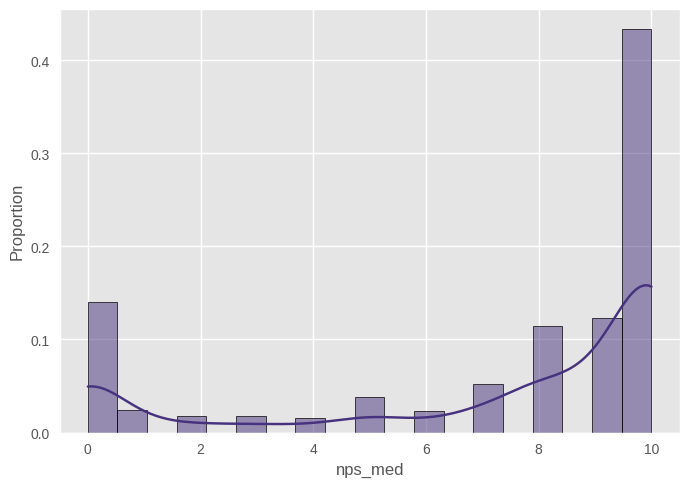

In [ ]:
ind_distrib_plot_seaborn(df = encuesta_indicadores_df,
                         var = "nps_med",
                         #cat = "tipo_nps",
                         stat = "proportion"
)

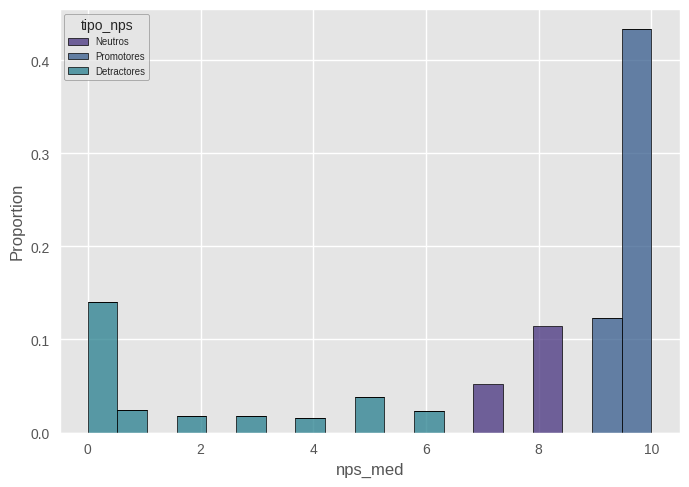

In [ ]:
ind_distrib_plot_seaborn(df = encuesta_indicadores_df,
                         var = "nps_med",
                         cat = "tipo_nps",
                         stat = "proportion"
)

In [ ]:
# Grouped histrograms plot
def distrib_plots_seaborn(df: pd.DataFrame = None, cat: str = None, stat = "count"):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
    stat (string, default = count): Aggregate statistic to compute in each bin.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(include = "number").columns)
  number_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(number_var / 2)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 2

  # 3. Create a figure and a set of subplots
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols)
  axs = axs.flatten()

  # 4. Group by other variable
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # 5. Create plots
  sns.set_palette(palette = "viridis") # Viridis pallete
  for i, var in enumerate(vars):
    # Figure
    sns.histplot(data = df,
                 x = var,
                 hue = cat,
                 ax = axs[i],
                 stat = stat,
                 kde = kde_aux,
                 multiple = "stack",
                 edgecolor = "black")
    axs[i].set_xlabel(var)

    # Legend
    if cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)

  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

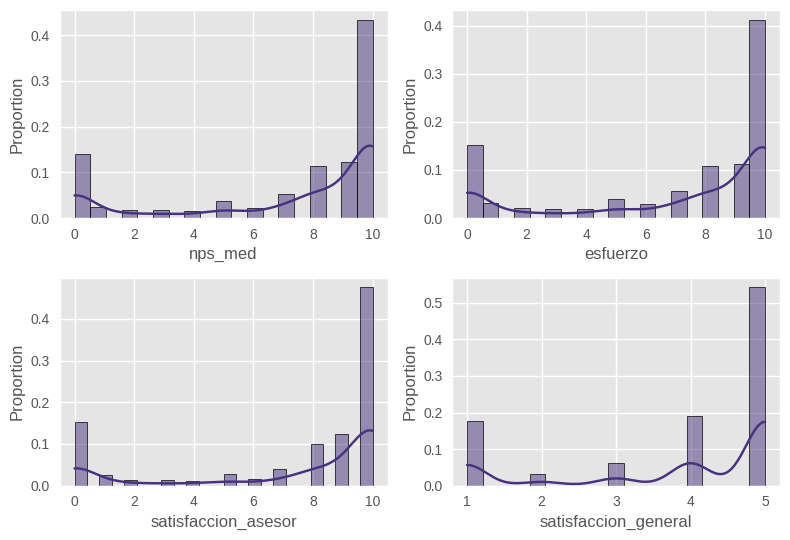

In [ ]:
distrib_plots_seaborn(encuesta_indicadores_df,
                      #cat = "tipo_nps",
                      stat = "proportion"
)

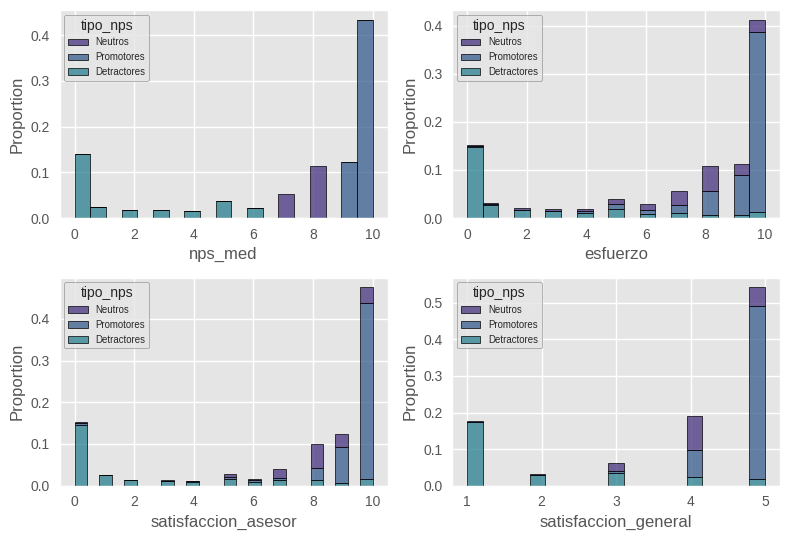

In [ ]:
distrib_plots_seaborn(encuesta_indicadores_df,
                      cat = "tipo_nps",
                      stat = "proportion"
)

#### e.2.4 Categorical Distributions

In [ ]:
# Indivudal barplot
def ind_barplot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None, stat = "count"):
  """
  Summary:
    Function to plot individual countplots from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set.
    var (string): Variable to plot.
    cat (string): Grouping variable.
    stat (string, default = count): Aggregate statistic to compute in each bin.
  Returns:
    barplot figure
  """
  df[var] = pd.Categorical(df[var], list(df[var].value_counts().index))

  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.histplot(df,
                     x = var,
                     hue = cat,
                     shrink = 0.75,
                     stat = stat,
                     multiple = "stack",
                     # alpha = 0.6,
                     edgecolor = "black")
  # Legend
  if cat == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

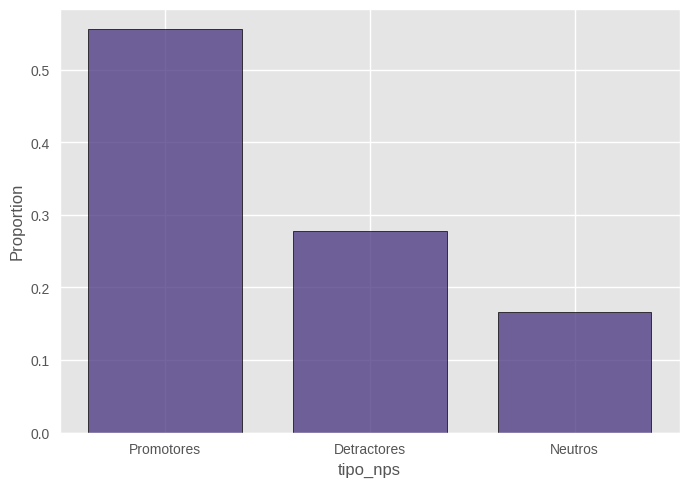

In [ ]:
ind_barplot_seaborn(df = encuesta_indicadores_df,
                     var = "tipo_nps",
                     # cat = "tipo_ces",
                     stat = "proportion"
)

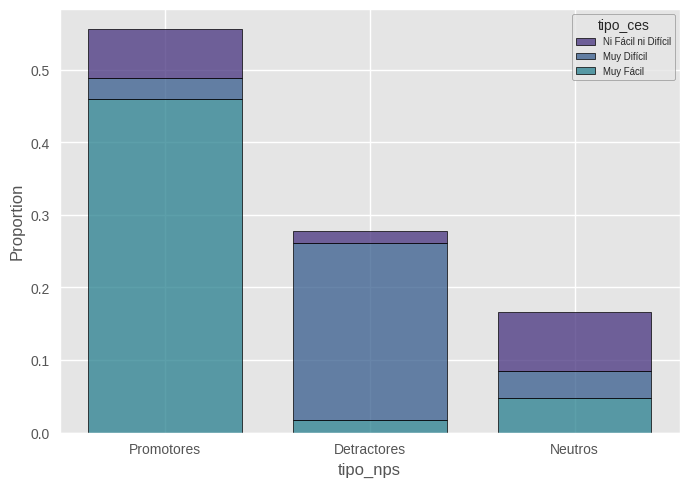

In [ ]:
ind_barplot_seaborn(df = encuesta_indicadores_df,
                    var = "tipo_nps",
                    cat = "tipo_ces",
                    stat = "proportion"
)

In [ ]:
def barplots_seaborn(df: pd.DataFrame, cat = None, stat = "count"):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
    stat (string, default = count): Aggregate statistic to compute in each bin.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)
  numb_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(numb_var / 3)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 3

  # 3. Create a figure and a set of subplots
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols,
                          figsize = (12, 25)
                          )
  axs = axs.flatten()

  # 4. Create plots
  for i, var in enumerate(vars):
    # Huer order
    df[var] = pd.Categorical(df[var],
                             list(df[var].value_counts().index))
    # Figure
    sns.histplot(df,
                 x = var,
                 hue = cat,
                 shrink = 0.75,
                 multiple = "stack",
                 stat = stat,
                 ax = axs[i],
                 # alpha = 0.6,
                 # discrete = True,
                 edgecolor = "black")
    # Set x label
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    # Set y label
    # axs[i].set_ylabel("Proportion")
    # Legend
    if cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)
  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

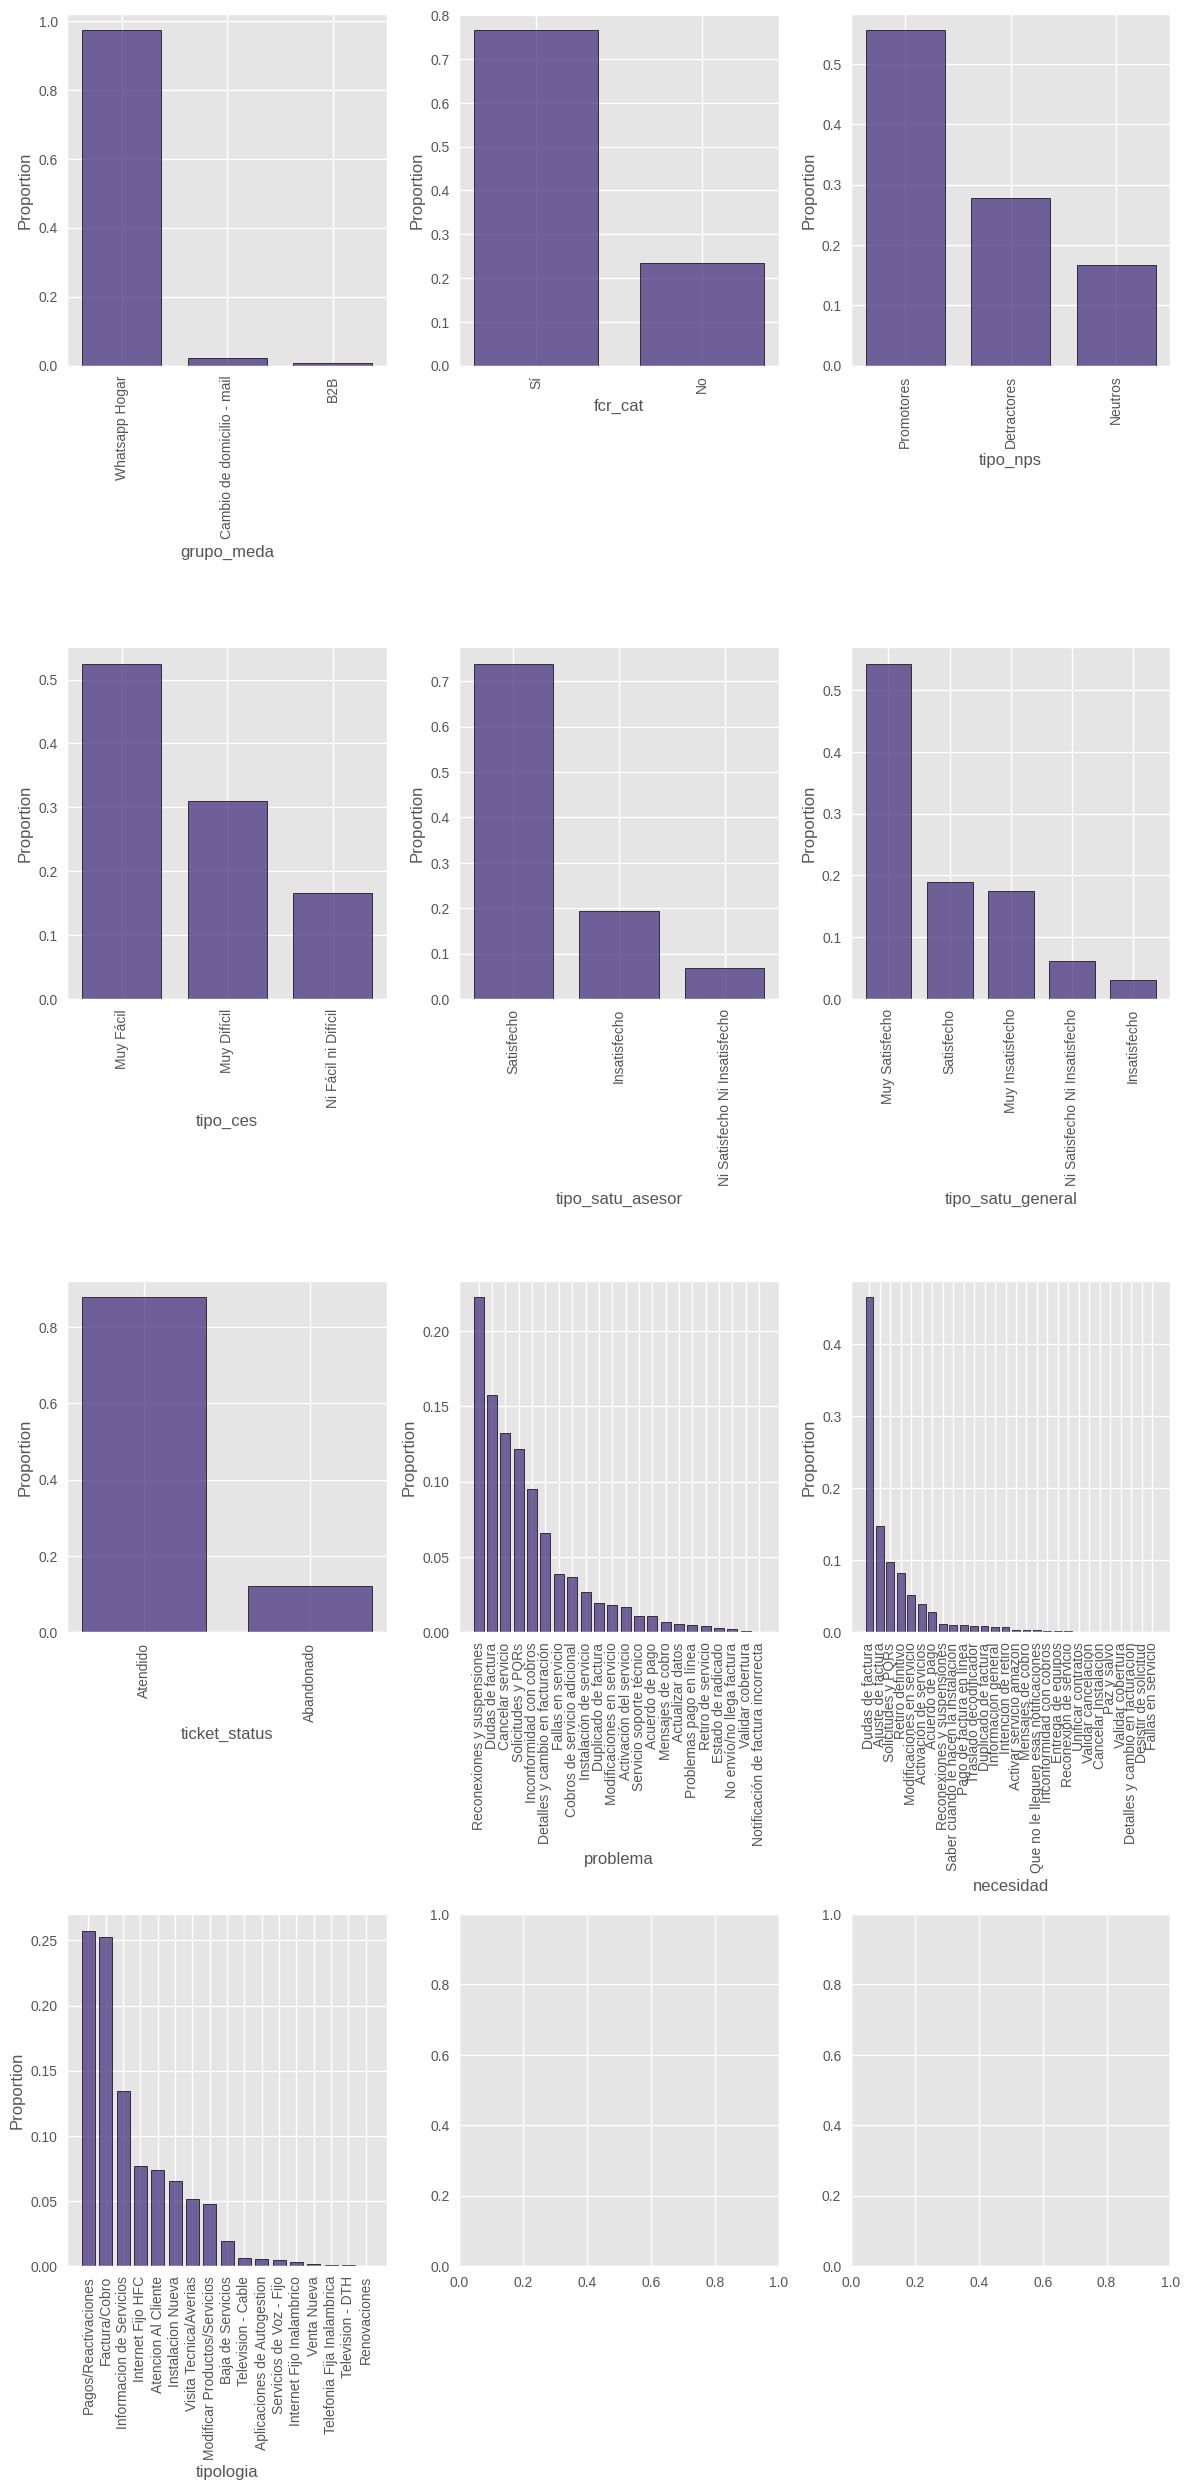

CPU times: user 3.41 s, sys: 148 ms, total: 3.56 s
Wall time: 3.8 s


In [ ]:
%%time
barplots_seaborn(encuesta_indicadores_df.drop(["id_asesor"], axis = 1),
                 # stat = "proportion",
                 # cat = "tipo_ces"
                 stat = "proportion"
)

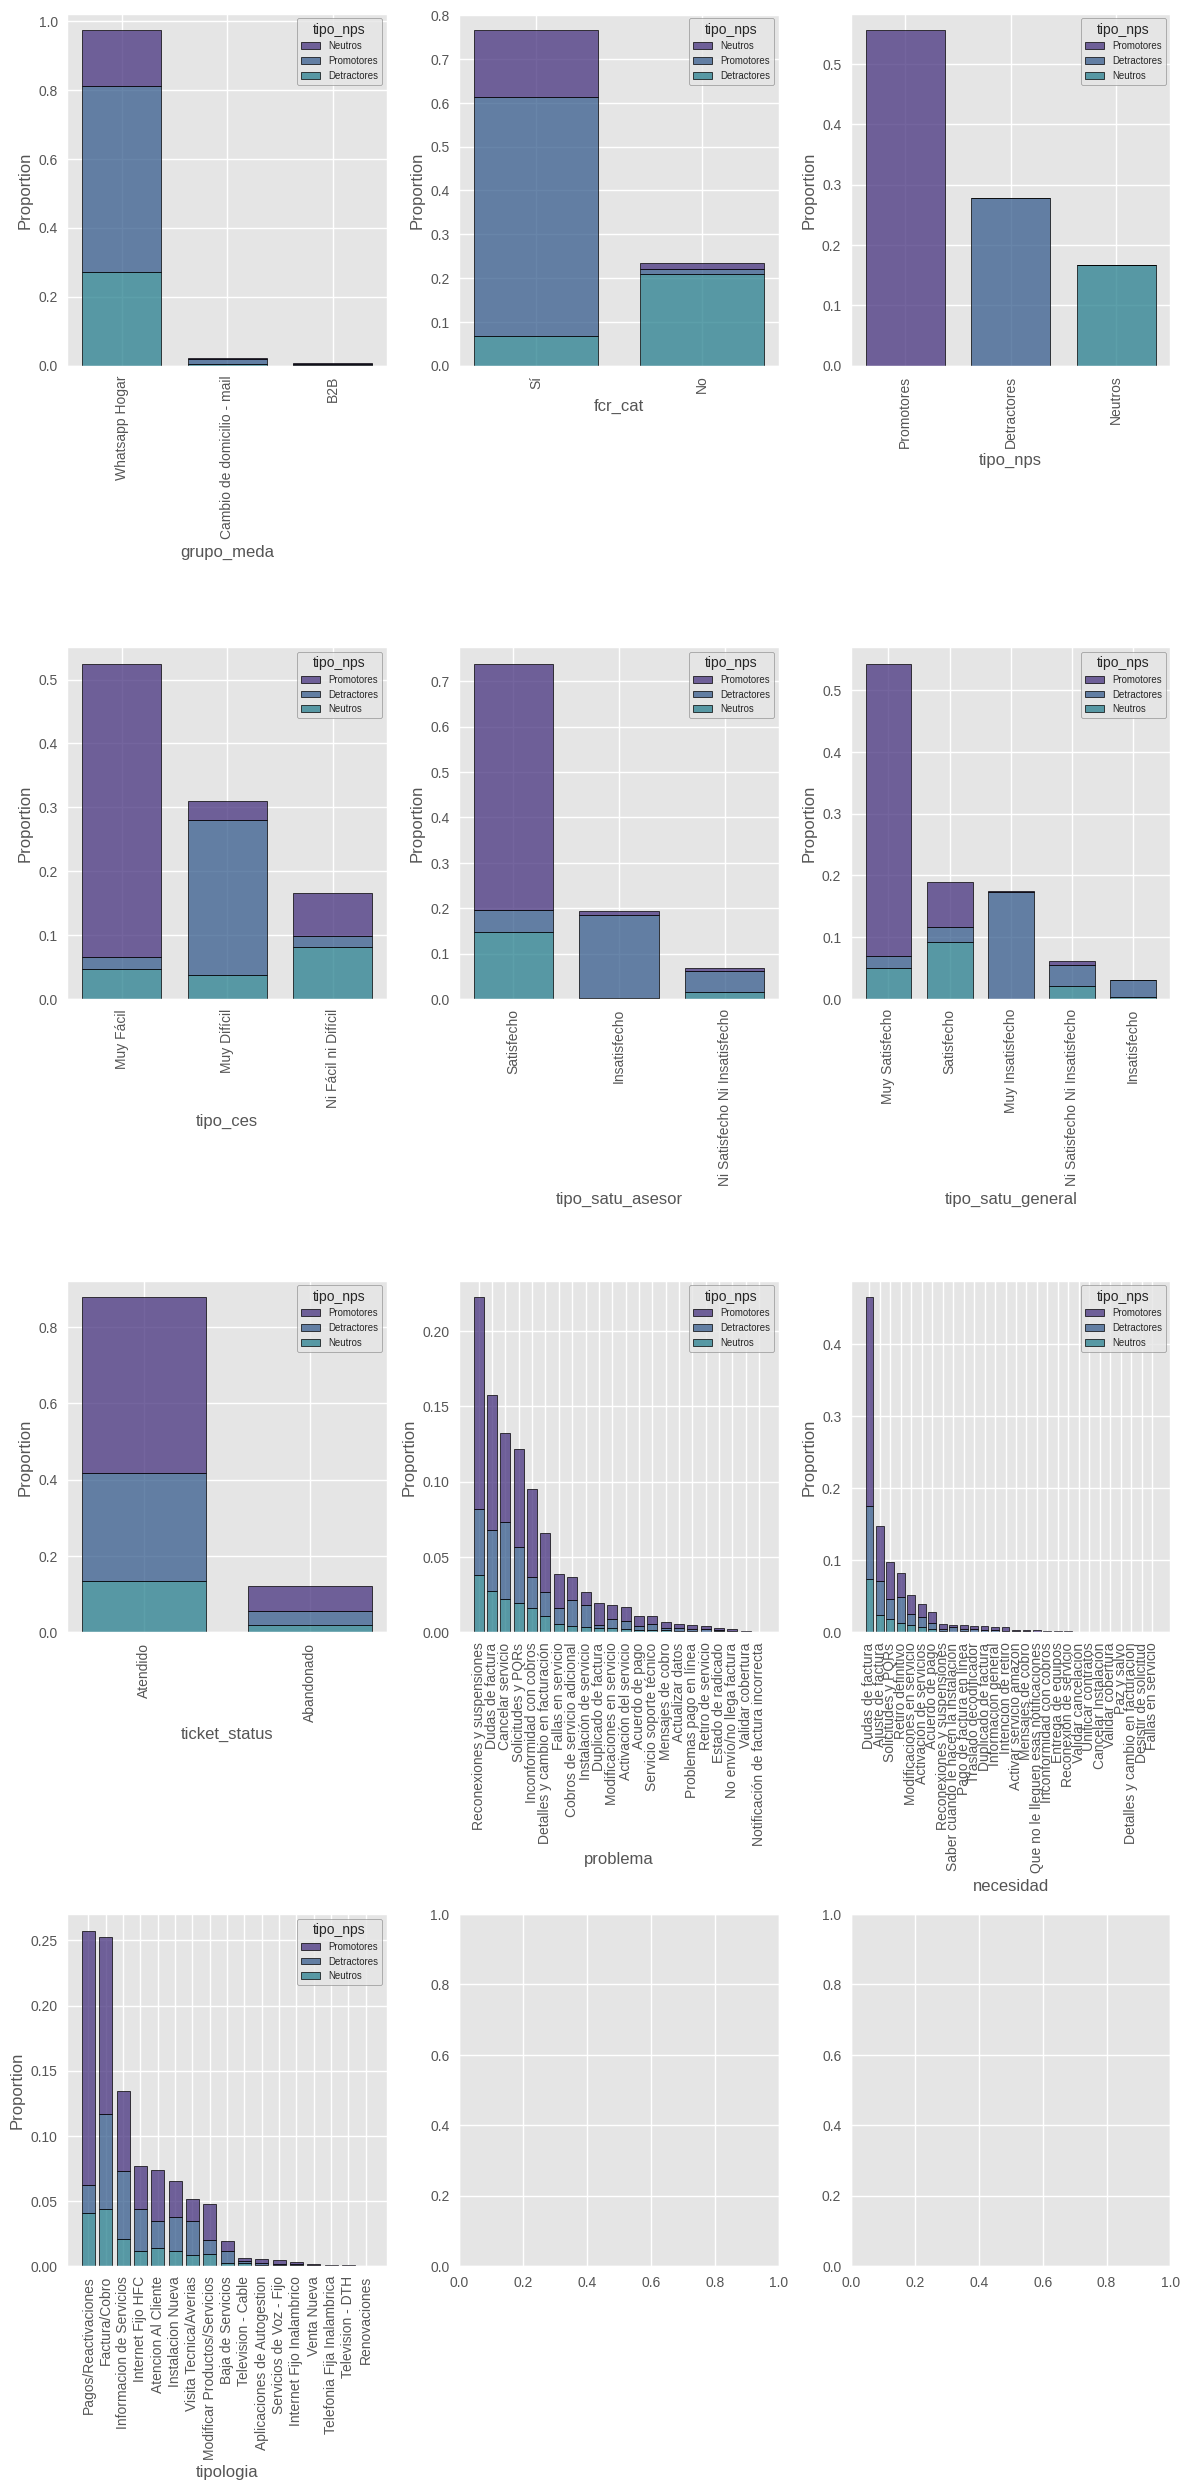

CPU times: user 5.25 s, sys: 176 ms, total: 5.43 s
Wall time: 7.33 s


In [ ]:
%%time
barplots_seaborn(encuesta_indicadores_df.drop(["id_asesor"], axis = 1),
                 stat = "proportion",
                cat = "tipo_nps"
)

#### e.2.5 Outliers Detection

In [ ]:
# Individual Boxplots
def ind_boxplot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None, hue: str = None):
  """
  Summary:
    Function to plot individual boxplots from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set
    var (string, default = None): numeric variable to plot, x axis
    cat (string, default = None): vertical variable, y axis
    hue (string, default = None): huening boxplot by categorical variable
  Returns:
    boxplot figure
  """
  # Order
  if cat == None:
    order_aux = None
  else:
    order_aux =list(df.groupby(by = cat, as_index = False)[var] \
                      .median() \
                      .sort_values(by = var, ascending = False) \
                      .set_index(cat) \
                      .index)
  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.boxplot(df,
                     x = var,
                     y = cat,
                     hue = hue,
                     notch = False,
                     order = order_aux,
                     # medianprops={"color": "white"},
                     # hue_order
                     )
  # Legend
  if hue == None or cat == None:
  # Not insert legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

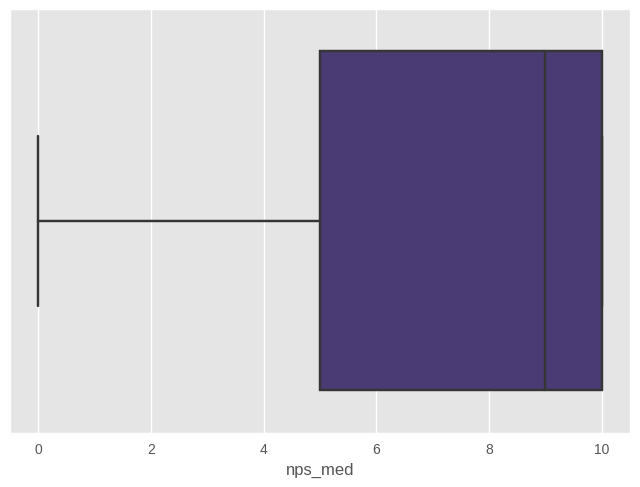

In [ ]:
ind_boxplot_seaborn(df = encuesta_indicadores_df,
                    var = "nps_med",
                    #cat = "tipo_ces",
                    #hue = "tipo_nps"
)

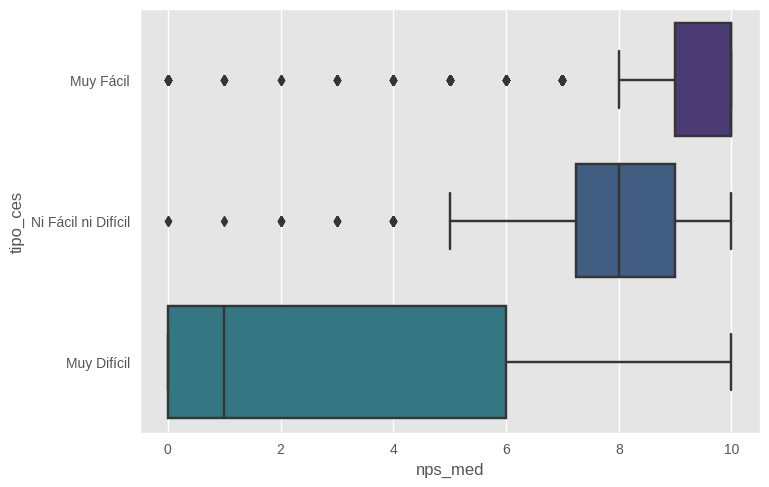

In [ ]:
ind_boxplot_seaborn(df = encuesta_indicadores_df,
                    var = "nps_med",
                    cat = "tipo_ces",
                    #hue = "tipo_nps"
)

In [ ]:
# Grouped boxplotx
def boxplots_seaborn(df: pd.DataFrame = None, cat: str = None, hue: str = None):
  """
  Summary:
    Function to create grouped boxplots , using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): data set
    cat (string, default = None): vertical variable, y axis
    hue (string, default = None): huening boxplot by categorical variable
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(include = "number").columns)
  number_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(number_var / 2)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 2

  # 3. Create a figure and a set of subplots
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols)
  axs = axs.flatten()

  # 4. Create plots
  for i, var in enumerate(vars):
    # Order
    if cat == None:
      order_aux = None
    else:
      order_aux =list(df.groupby(by = cat, as_index = False)[var] \
                        .median() \
                        .sort_values(by = var, ascending = False) \
                        .set_index(cat) \
                        .index)
    # Figure
    sns.boxplot(data = df,
                x = var,
                y = cat,
                hue = hue,
                notch = False,
                order = order_aux,
                # medianprops={"color": "white"},
                ax = axs[i],
                # alpha = 0.6,
                # hue_order
                )
    axs[i].set_xlabel(var)

    # Legend
    if hue == None or cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)

  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

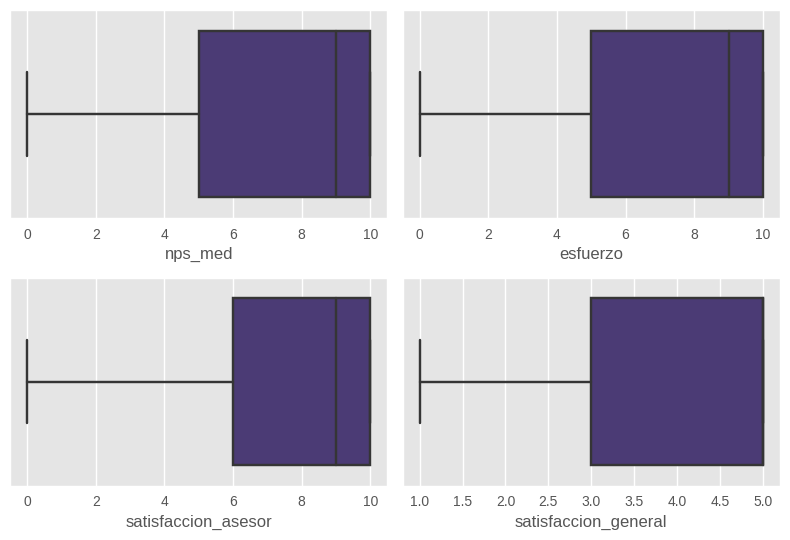

In [ ]:
boxplots_seaborn(encuesta_indicadores_df,
                 # cat = "tipo_nps",
                 # hue = "tipo_nps"
)


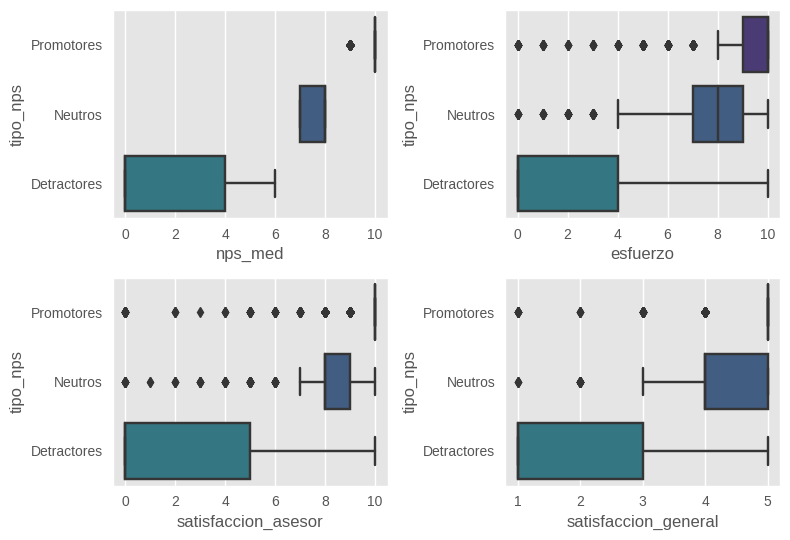

In [ ]:
boxplots_seaborn(encuesta_indicadores_df,
                 cat = "tipo_nps",
                 # hue = "tipo_nps"
)

##### Unsupervised Outlier Detection

In [ ]:
def outliers_detection_if(df: pd.DataFrame, method: str = "ECOD"):
  """
  Summary:
    Unsupervised Multivariate Outlier Detection using Empirical Cumulative Distribution Functions (ECOD) or Isolation Forest.
    More details: https://pyod.readthedocs.io/en/latest/index.html, https://github.com/yzhao062/pyod/blob/master/examples/iforest_example.py
  Parameters:
    df (pandas.DataFrame): Dataset.
    method (str, default = "IForest"): ECOD or Isolation Forest outlier detection algorithm
  Returns:
    Subset of original DataFrame with considered outlier observations.
  """
  # Only for numerical data
  df1 = df.select_dtypes(include = "number").dropna().sort_index().reset_index(drop = True)

  if method == 'IForest':
  # Isolation Forest
    model_name = 'IForest'
    model = IForest(n_estimators = 100,
                    max_samples = 'auto',
                    contamination = 0.1,
                    max_features = 1.0,
                    bootstrap = False,
                    n_jobs = 1,
                    behaviour = 'old',
                    random_state = 123456,
                    verbose = 0)
  # ECOD detector
  elif method == "ECOD":
    model_name = 'ECOD'
    model = ECOD()
  else:
    pass

  # 1. Fit the model
  model.fit(df1)

  # 2. Get the prediction labels and outlier scores of the original data
  y_train_pred = model.labels_ # Binary labels (0: inliers, 1: outliers)
  y_train_scores = model.decision_scores_ # Raw outlier scores

  # Combine original df with outliers labels
  outliers_labels = pd.DataFrame(y_train_pred, columns = ["is_outlier"])
  df1["is_outlier"] = outliers_labels.loc[:, "is_outlier"]

  # Combine original df with outliers scores
  outliers_scores = pd.DataFrame(y_train_scores, columns = ["outlier_score"])
  df1["outlier_score"] = outliers_scores.loc[:, "outlier_score"]

  # 3. Global outliers results
  global outliers
  outliers = df1.query("is_outlier == 1")

  # 4. Output
  print(f"{Fore.RED}{outliers.shape[0]}{Style.RESET_ALL} outliers detected base on numerical data and {Fore.GREEN}{method}{Style.RESET_ALL} algorithm.")
  print(f"{Fore.RED}outliers{Style.RESET_ALL} DataFrame was created.")
  print("\n")
  print(outliers.head().to_string())

In [ ]:
outliers_detection_if(encuesta_indicadores_df,
                      # method = 'IForest'
)

0 outliers detected base on numerical data and ECOD algorithm.
outliers DataFrame was created.


Empty DataFrame
Columns: [nps_med, esfuerzo, satisfaccion_asesor, satisfaccion_general, is_outlier, outlier_score]
Index: []


#### e.2.6 Correlation

In [ ]:
# Individual Scatterplot
def ind_scatterplot_seaborn(df: pd.DataFrame = None, x = None, y = None, hue: str = None):
  """
  Summary:
    Function to plot individual scatterplots from two numerical and determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): Dataset.
    x (string): Horizontal variable to plot.
    y (string): Vertical variable to plot.
    hue (string, default = None): Grouping variable.
  Returns:
    Scatterplot figure.
  """
  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.scatterplot(df,
                        x = x,
                        y = y,
                        hue = hue)
  # Legend
  if hue == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)
    plt.legend(bbox_to_anchor=(1.02, 1),
               loc = 'upper left',
               borderaxespad = 0)

  plt.show()

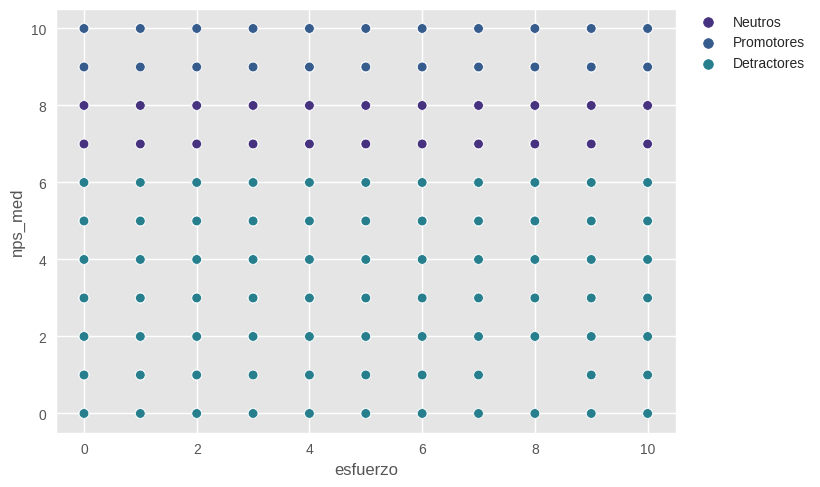

In [ ]:
ind_scatterplot_seaborn(df = encuesta_indicadores_df,
                        x = "esfuerzo",
                        y = "nps_med",
                        hue = "tipo_nps"
)

In [ ]:
# Correlation Heatmap

def corr_heatmap_seaborn(df: pd.DataFrame = None):
  """
  Summary:
    Function to create correlation matrix using Spearman's rank correlation coefficient and seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame, default = None): Dataset.
  Returns:
   Correlation heatmap.
  """
  sns.set_palette(palette = "viridis") # Viridis pallete
  sns.heatmap(df.select_dtypes(include = ["number"]).corr(method = 'spearman'),
              annot = True,
              cmap = sns.color_palette("viridis", as_cmap = True),
              linewidth = 0.5,
              fmt = ".2f")
  plt.show()

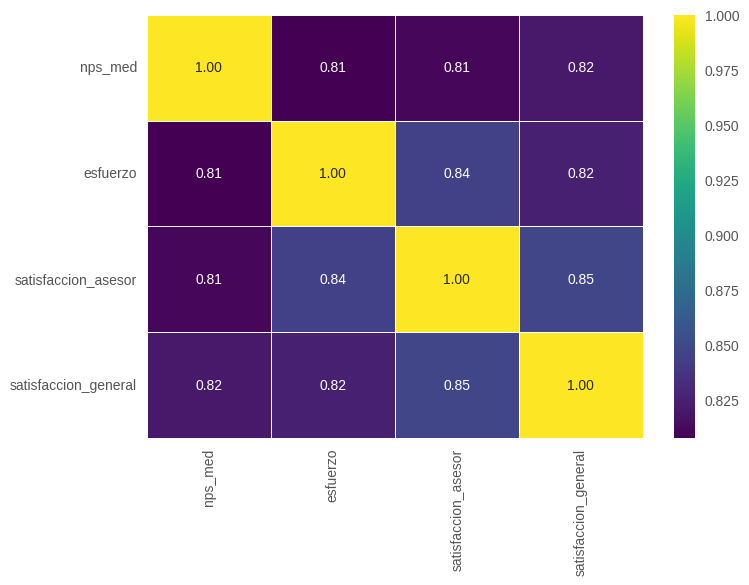

In [ ]:
corr_heatmap_seaborn(encuesta_indicadores_df)

In [ ]:
# Pairplot - Scatter plots
def pairplot_seaborn(df: pd.DataFrame = None, hue: str = None, kdeplot: bool = False):
  """
    Summary:
      Plot pairwise relationships betwenn numerical variables in a dataset. Seaborn plotting engine.
    Parameters:
      df (pandas.DataFrame, default = None): Dataset
      hue (string, default = None): Huening scatter plost and histograms by categorical variable.
      kdeplot (bool, default = False): kernel density estimate (KDE) plot for visualizing the distribution.
    Returns_
      Pairplot figure.
  """
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.pairplot(df,
                     hue = hue,
                     corner = False,
                     # diag_kind = "hist",
                     kind = "scatter")
  if kdeplot == True:
    fig.map_lower(sns.kdeplot,
                  levels = 4,
                  color = ".2")
    fig.map_upper(sns.kdeplot,
                  levels = 4,
                  color = ".2")
  else:
    pass

  plt.show()

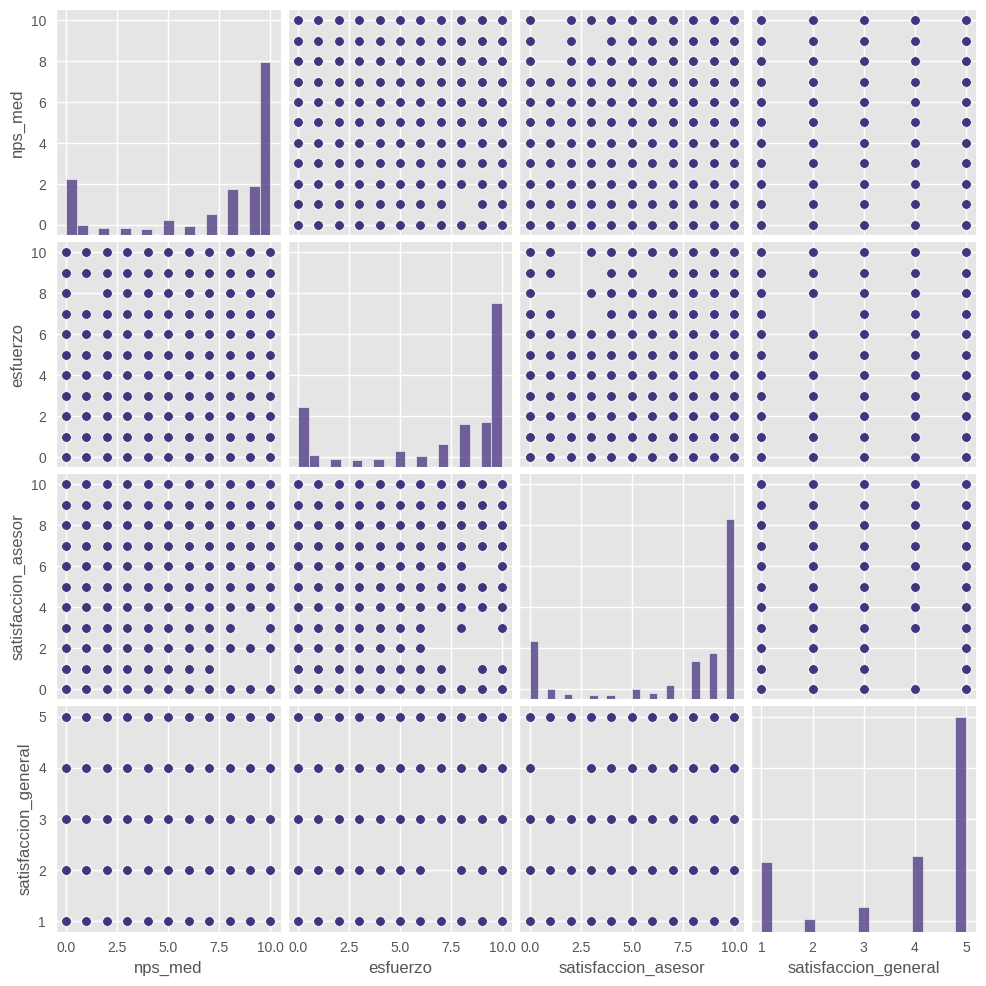

In [ ]:
pairplot_seaborn(encuesta_indicadores_df,
                 # hue = "tipo_nps",
                 kdeplot = False
)

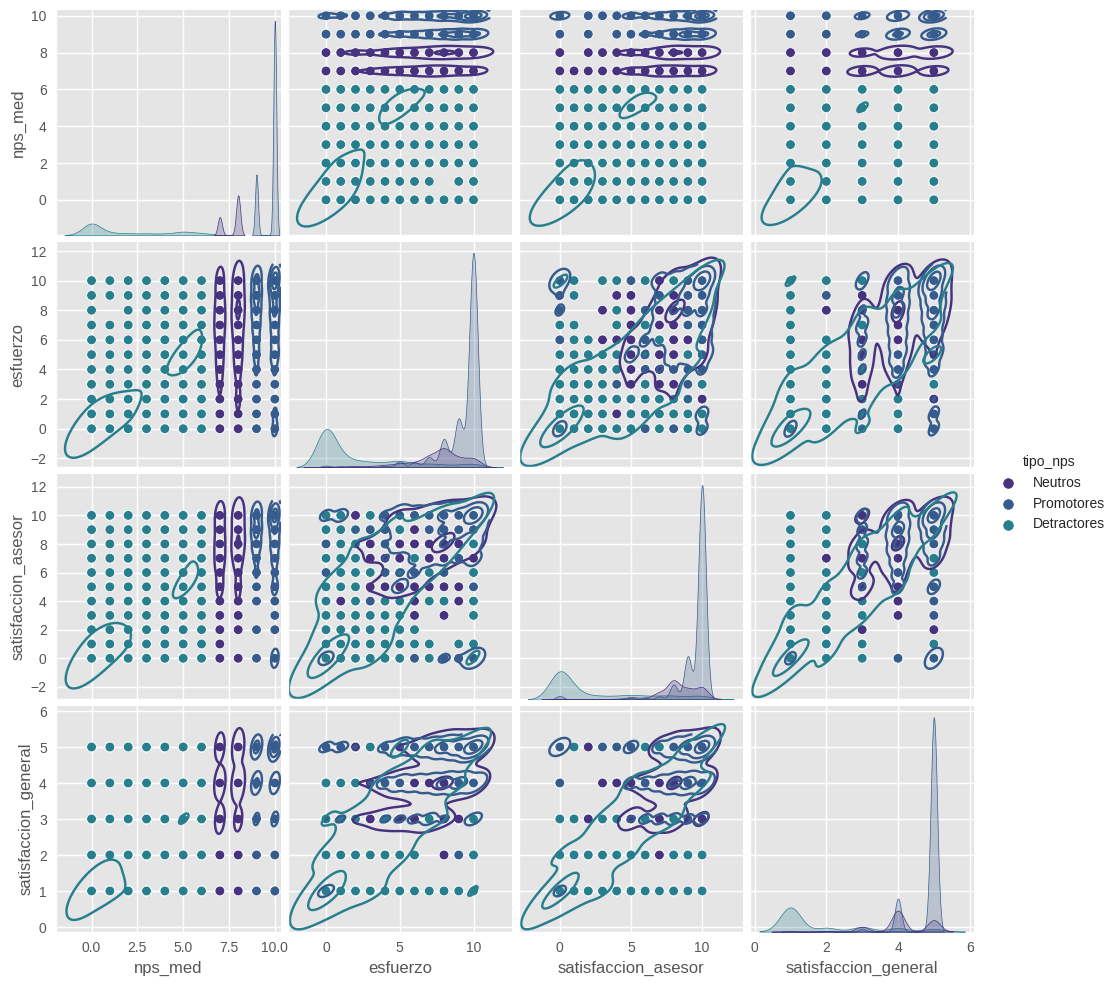

In [ ]:
pairplot_seaborn(encuesta_indicadores_df,
                 hue = "tipo_nps",
                 kdeplot = True
)

#### e.2.7 Multiple Correspondence Analysis

In [ ]:
# Categorical variables:
def categorical_eda(df: pd.DataFrame = None, levels: int = 10):
  """
  Summary:
    Function to select categorical variables with n or fewer levels. Create a list of variables to perform MCA.
  Parameters:
    df (pandas.DataFrame): Dataset.
    levels (int, default = 10): Number of components in MCA.
  Returns:
    Categories per variable and list (global vars_mca) that contains categorical variables with n o fewer levels.
  """

  # Important note
  print(Fore.BLUE + "MCA is used to analyze a set of observations described by a set of nominal variables." + Style.RESET_ALL)
  print("\n")

  # 0. Categorical variables, not numerical o datetime
  cat_vars = list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)

  # 1. Variables to perform multiple correspondence analysis
  global vars_mca
  vars_mca = []

  # 2. Count levels per categorical variable
  for col in cat_vars:
    categories = list(df[col].dropna().unique())
    cat_len = len(categories)

    if cat_len <= levels:
      vars_mca.append(col)
    else:
      pass

    print(f"{Fore.GREEN + col + Style.RESET_ALL}, levels = {Fore.BLUE} {cat_len} {Style.RESET_ALL}, {categories[:30]}")

  print("\n")
  print(Fore.BLUE + "Variables to performance MCA: " + Style.RESET_ALL, vars_mca)

In [ ]:
categorical_eda(encuesta_indicadores_df.drop(["ticket_status"], axis = 1),
                levels = 10
)

MCA is used to analyze a set of observations described by a set of nominal variables.


grupo_meda, levels =  3 , ['Whatsapp Hogar', 'Cambio de domicilio - mail', 'B2B']
fcr_cat, levels =  2 , ['Sí', 'No']
tipo_nps, levels =  3 , ['Neutros', 'Promotores', 'Detractores']
tipo_ces, levels =  3 , ['Ni Fácil ni Difícil', 'Muy Difícil', 'Muy Fácil']
tipo_satu_asesor, levels =  3 , ['Satisfecho', 'Insatisfecho', 'Ni Satisfecho Ni Insatisfecho']
tipo_satu_general, levels =  5 , ['Satisfecho', 'Muy Satisfecho', 'Muy Insatisfecho', 'Ni Satisfecho Ni Insatisfecho', 'Insatisfecho']
problema, levels =  22 , ['Cancelar servicio', 'Solicitudes y PQRs', 'Reconexiones y suspensiones', 'Dudas de factura', 'Inconformidad con cobros', 'Cobros de servicio adicional', 'Fallas en servicio', 'Detalles y cambio en facturación', 'Servicio soporte técnico', 'Modificaciones en servicio', 'Instalación de servicio', 'Actualizar datos', 'Activación del servicio', 'Duplicado de factura', 'Retiro de servicio', 'Acuer

In [ ]:
# Multiple correspondence analysis - Scree plot
def scree_plot_mca(df: pd.DataFrame = None):
  """
  Summary:
   Function to create a scree plot in Multiple Correspondence Analysis to figure out how many components retain the highest explained variance.
  Parameters:
    df (pandas DataFrame): Dataset without missing values.
  Returns:
    Figure of scree plot.
  """

  global df1
  df1 = df[vars_mca].dropna() # DataFrame without NAs

  # 0. MCA object
  mca = prince.MCA(n_components = 10,
                   n_iter = 3,
                   copy = True,
                   check_input = True,
                   engine ='sklearn',
                   random_state = 123456)

  # 1. Fit MCA objetc
  mca = mca.fit(df1)

  # -------------------------------------------------------------------------------------------------------------------
  # 2. Tranform results from mca to plot with seaborn
  df1 = mca.eigenvalues_summary
  df1.reset_index(inplace = True)
  df1.iloc[:, 2] = df1.iloc[:, 2].str.strip("%").astype("float")
  df1.iloc[:, 3] = df1.iloc[:, 3].str.strip("%").astype("float")
  print(df1.to_markdown())
  print("\n")

  # -------------------------------------------------------------------------------------------------------------------
  # 3. MCA Scree plot - Explained Variance

  # 3.1 Plot barplot on axis 1
  sns.set_palette(palette = "viridis") # Viridis pallete
  plt.figure(1)
  ax1 = sns.barplot(data = df1,
                    x = "component",
                    y = '% of variance',
                    palette = sns.color_palette(palette = "viridis"))

  ax1.set_xlabel('Component')
  ax1.set_ylabel('% of variance')
  # ax1.set_ylim(0, 40)

  # 3.2 Set up the 2nd axis
  ax2 = ax1.twinx()

  # 3.3 Line plot chart on axis 2
  sns.lineplot(data = df1,
              x = "component",
              y = '% of variance (cumulative)',
              sort = False,
              markers = True,
              marker = 'o',
              markersize = 4,
              linewidth = 1.5,
              color = "gray",
              ax = ax2)     # Pre-existing axes for the plot

  # 3.4 Legend, axis labels and grid
  ax2.grid(False) # Turn off grid #2
  ax2.legend(['% of variance (cumulative)'], loc = "center right")
  ax2.set_ylabel('% of variance (cumulative)')
  ax2.set_ylim(0, 100)
  ax2.set_title("MCA Scree plot - Explained Variance")

  plt.show()

|    |   component |   eigenvalue |   % of variance |   % of variance (cumulative) |
|---:|------------:|-------------:|----------------:|-----------------------------:|
|  0 |           0 |        0.708 |           32.7  |                        32.7  |
|  1 |           1 |        0.325 |           14.98 |                        47.68 |
|  2 |           2 |        0.241 |           11.1  |                        58.78 |
|  3 |           3 |        0.169 |            7.81 |                        66.59 |
|  4 |           4 |        0.167 |            7.69 |                        74.28 |
|  5 |           5 |        0.164 |            7.58 |                        81.86 |
|  6 |           6 |        0.106 |            4.9  |                        86.75 |
|  7 |           7 |        0.101 |            4.68 |                        91.43 |
|  8 |           8 |        0.074 |            3.42 |                        94.85 |
|  9 |           9 |        0.038 |            1.76 |            

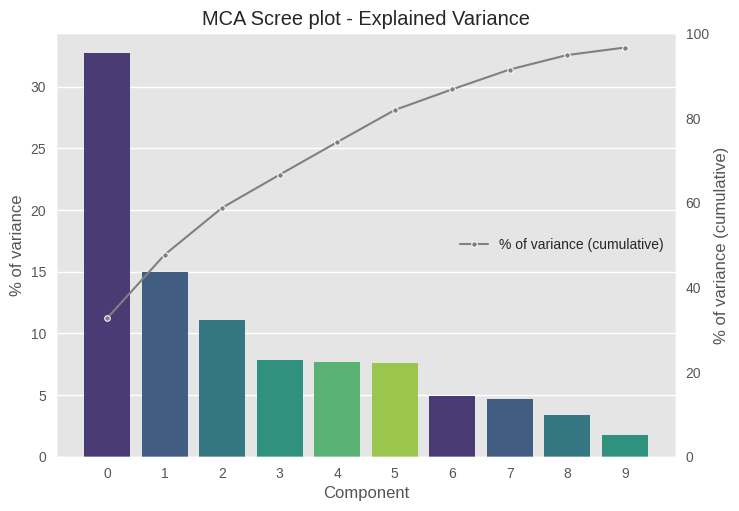

In [ ]:
scree_plot_mca(encuesta_indicadores_df.drop(["ticket_status"], axis = 1))

In [ ]:
# Multiple correspondence analysis - Biplot
def biplot_mca(df: pd.DataFrame = None):
  """
  Summary:
    Function to create a Biplot, represents results from Multiple correspondence analysis.
  Parameters:
    df (pandas DataFrame): Dataset without missing values.
  Returns:
    Figure of Biplot, two principal components.
  """

  df2 = df[vars_mca].dropna() # DataFrame without NAs

  # 0. MCA object
  mca = prince.MCA(n_components = 10,
                    n_iter = 3,
                    copy = True,
                    check_input = True,
                    engine ='sklearn',
                    random_state = 123456)

  # 1. Fit MCA objetc
  mca = mca.fit(df2)

  # 2. Biplot

  # 2.1 Tranform results from mca to create biplot with seaborn
  df2 = mca.column_coordinates(df2)
  df2.reset_index(inplace = True)
  df2["variable"] = df2.iloc[:, 0].map(lambda x: x[0: x.rfind("_")])
  df2["level"] = df2.iloc[:, 0].map(lambda x: x[x.rfind("_") + 1: ])

  # 2.2 Scatterplot
  sns.set_palette(palette = "viridis") # Viridis pallete
  mca_fig  = sns.scatterplot(data = df2,
                             x = df2.iloc[:, 1], # Component 1
                             y = df2.iloc[:, 2], # Component 2
                             hue = "variable",
                             # palette = sns.color_palette(palette = "viridis")
                             )

  # 2.3 Add title and labels
  mca_fig.set(title ='Multiple Correspondence Analysis - Biplot',
              xlabel = f"Component 0 ({df1.iat[0, 2]}%)", # Explained variance by component 1
              ylabel = f"Component 1 ({df1.iat[1, 2]}%)") # Explained variance by component 2

  # 2.4 Legend position outside principal frame
  sns.move_legend(mca_fig,
                  "best",
                  fontsize = 'x-small',
                  edgecolor = "gray",
                  # bbox_to_anchor = (.3, 1),
                  # ncol = 3,
                  # title = None,
                  title_fontsize = 'medium',
                  frameon = True)

  plt.legend(bbox_to_anchor = (1.02, 1),
             loc = 'upper left',
             borderaxespad = 0)

  # 2.5 Add label in Biplot
  texts = [plt.text(df2.iloc[i, 1],  df2.iloc[i, 2], df2.iloc[i, 12], ha = 'center', va = 'center', fontsize = 9) for i in range(len(list(df2.iloc[:, 12])))]
  adjust_text(texts)

  plt.show()

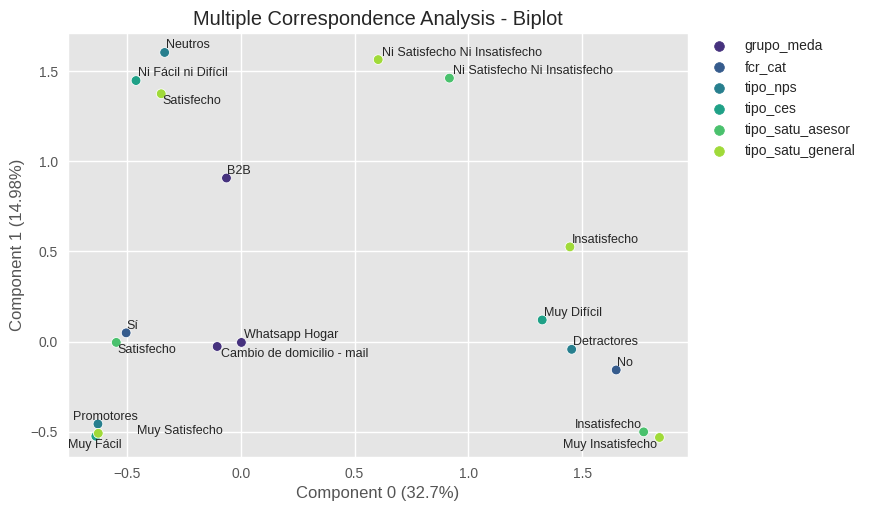

In [ ]:
biplot_mca(encuesta_indicadores_df.drop(["ticket_status"], axis = 1))

### Missing from EDA

* Time series EDA: extract datetime variables such as month, year, and day, and group them by their respective values; figure out some summary statistics base on other categorical variables (mean, median, quartiles, min, max, std, ...), plot time series.

* Figure out some summary statistics from all categorical variable's levels, i.e., calculate mean, median, quartiles, min, max, and standard deviation for the 'Promotores,' 'Detractores,' and 'Neutros' levels in the 'tipo_nps' variable to distinguish what makes each group different.

## 1- EDA Results

* The largest number of requests to the customer service lines (141) were made on December 27, 2021, with a greater predominance in the final months of the year.

* The average nps is equal to 7.2, the median value is 9. The average effort is 6.9, its median corresponds to 9. The average overall satisfaction is 3.8 with a median of 5.

* Promoter clients are characterized by having granted an nps greater than or equal to 9, neutral clients by granting an nps of 7 or 8 and detractor clients by presenting an nps less than 7.

* Detractive customers show greater difficulty in contacting and receiving attention from the service lines, in addition to establishing a state of dissatisfaction with their advisor in charge.

* 97% of requirements entered through WhatsApp Hogar. 56% of clients are classified as Promoters of the brand, followed by 28 people who establish themselves as detractors, the rest are considered neutral. 74% of clients classified the service provided by their advisor as Satisfactory, 20% demonstrated poor service. 54% of customers who required customer service confirm that they were very satisfied with the process carried out. The biggest problems for which the service lines were consulted correspond to reconnections and suspensions, doubts in invoices and cancellation of services. The predominant need is doubts and adjustments regarding invoices.

## 2- Advisor Ranking

What are the advisors' performances? Which ones are the best, and why?

In [ ]:
%%time

# Top 10 advisors based on the number of clients who rated their work as 'Satisfied'.
encuesta_indicadores_df \
  .groupby("id_asesor", as_index = True) \
  .agg(avg_satisf = pd.NamedAgg(column = "satisfaccion_asesor", aggfunc = "mean"),
       median_satisf = pd.NamedAgg(column = "satisfaccion_asesor", aggfunc = "median"),
       std_satisf = pd.NamedAgg(column = "satisfaccion_asesor", aggfunc = "std"),
       eval = pd.NamedAgg(column = "tipo_satu_asesor", aggfunc = "count"),
       satisfecho = pd.NamedAgg(column = "tipo_satu_asesor", aggfunc = lambda x: sum([1 for i in x if i == "Satisfecho"])),
       insatisfecho = pd.NamedAgg(column = "tipo_satu_asesor", aggfunc = lambda x: sum([1 for i in x if i == "Insatisfecho"])),
       neutro = pd.NamedAgg(column = "tipo_satu_asesor", aggfunc = lambda x: sum([1 for i in x if i == "Ni Satisfecho Ni Insatisfecho"]))) \
  .assign(satisf_prop = lambda x: x["satisfecho"] / x["eval"]) \
  .round(2) \
  .dropna() \
  .sort_values(by = ["satisfecho"], ascending = [False]) \
  .iloc[:10, :]

CPU times: user 63.6 ms, sys: 0 ns, total: 63.6 ms
Wall time: 167 ms


avg_satisf  median_satisf  std_satisf  eval  satisfecho  \
id_asesor                                                             
Asesor_13         7.74           10.0        3.58   148         118   
Asesor_204        7.85            9.0        3.32   137         108   
Asesor_170        8.06           10.0        3.18   122         100   
Asesor_17         8.12           10.0        3.11   120          99   
Asesor_10         7.07           10.0        4.07   132          96   
Asesor_22         7.58            9.0        3.34   127          94   
Asesor_121        8.23           10.0        3.09    92          77   
Asesor_135        7.39            9.0        3.79   100          76   
Asesor_77         7.21            9.0        4.00   100          76   
Asesor_49         7.39           10.0        3.87    99          75   

            insatisfecho  neutro  satisf_prop  
id_asesor                                      
Asesor_13             24       6         0.80  
Asesor_204            18      11         0.79  
Asesor_170            14       8         0.82  
Asesor_17             12       9         0.82  
Asesor_10             32       4         0.73  
Asesor_22             17      16         0.74  
Asesor_121            10       5         0.84  
Asesor_135            20       4         0.76  
Asesor_77             23       1         0.76  
Asesor_49             20       4         0.76

## 3- Predicting NPE Type


Using at least two supervised models, predict the variable Tipo_NPS found in the Encuesta_Indicadore database. Multiclass Classification

### Pycaret
>[Home - Pycaret](https://pycaret.org/)

>[Read the docs - Pycaret](https://pycaret.readthedocs.io/en/stable/index.html)

#### I. Data

In [ ]:
# 1. Data

data_pycaret = encuesta_indicadores_df \
                  .copy(deep = True) \
                  .drop(["ticket_status", "id_asesor"], axis = 1)

data_pycaret.dtypes

fecha_meda              datetime64[ns]
grupo_meda                    category
nps_med                           int8
fcr_cat                       category
esfuerzo                          int8
satisfaccion_asesor            float16
satisfaccion_general           float16
tipo_nps                      category
tipo_ces                      category
tipo_satu_asesor              category
tipo_satu_general             category
problema                      category
necesidad                     category
tipologia                     category
dtype: object

#### II. Init the experimentation class and init setup

In [ ]:
%%time

# 2.1 Init the experimentation class

nps_multiclass = ClassificationExperiment()

# 2.2 Init setup

nps_multiclass.setup(data = data_pycaret,
                     target = 'tipo_nps', # Target column in data
                     index = True, # Hold original index
                     experiment_name = "Predicting NPS Type - v0.1",
                     session_id = 123,
                     preprocess = True,
                     # profile = True, # An interactive EDA report is displayed
                     verbose = True, # When set to False, Information grid is not printed.
                     train_size = 0.75, # Proportion of the dataset to be used for training and validation
                     data_split_stratify = True, # Controls stratification during train_test_split
                     test_data = None,

                     # Dtypes categorical features
                     ordinal_features = {"tipo_ces": ["Muy Fácil", "Ni Fácil ni Difícil", "Muy Difícil"],
                                         "tipo_satu_asesor": ["Insatisfecho", "Ni Satisfecho Ni Insatisfecho", "Satisfecho"],
                                         "tipo_satu_general": ["Muy Insatisfecho", "Insatisfecho", "Ni Satisfecho Ni Insatisfecho", "Satisfecho", "Muy Satisfecho"]},
                     categorical_features = ["grupo_meda", "fcr_cat", "problema", "necesidad", "tipologia"],
                     max_encoding_ohe = 30, # Categorical columns with max_encoding_ohe or less unique values are encoded using OneHotEncoding
                     rare_to_value = 0.05, # Minimum fraction of category occurrences in a categorical column
                     rare_value = "Otro", # Value with which to replace rare categories

                     # Dtypes numerical features
                     numeric_features = ["nps_med", "esfuerzo", "satisfaccion_asesor", "satisfaccion_general"],

                     # Dtypes datetime features
                     date_features = ["fecha_meda"],
                     create_date_columns = ["day", "month", "year"], # Columns to create from the date features

                     # Normalize data: depending on similarity of numerical variables scales
                     normalize = True,
                     normalize_method = "robust", # z-score, minmax, maxabs, robust

                     # Transform data: depending on skewnees, kurtosis, outiler presence
                     transformation = True,
                     transformation_method = "yeo-johnson",

                     # Handled missing values
                     imputation_type = "iterative",
                     iterative_imputation_iters = 5,
                     numeric_iterative_imputer = "rf", #"lightgbm", # Default method
                     categorical_iterative_imputer = "lightgbm", # Default method

                     # Outliers
                     remove_outliers = False,
                     outliers_method = "ee", # "iforest": Uses sklearn’s IsolationForest; "ee": Uses sklearn’s EllipticEnvelope; "lof": Uses sklearn’s LocalOutlierFactor
                     outliers_threshold = 0.05, # Percentage of outliers to be removed from the dataset

                     # (didn't work)
                     # Imbalance data: depending on levels distributions in target variable
                     fix_imbalance = False, # Dataset has unequal distribution of target class it can be balanced using this parameter
                     fix_imbalance_method = 'SMOTE', # Synthetic Minority Over-sampling Technique, choose from the name of an imblearn estimator

                     # (didn't work)
                     # Feature selection
                     feature_selection = False,
                     feature_selection_method = "classic", # "sequential": uses sklearn's SequentialFeatureSelector, "classic": uses sklearn's SelectFromModel
                     feature_selection_estimator = "rf", # Classifier used to determine the feature importance
                     n_features_to_select = 0.2, # The maximum number of features to select with feature_selection
                     low_variance_threshold = 0.1, # Remove features with a training-set variance lower than the provided threshold
                     pca = False,

                     # Multicollinearity
                     remove_multicollinearity = True, # Features with the inter-correlations higher than the defined threshold are removed
                     multicollinearity_threshold = 0.85, # Minimum absolute Pearson correlation to identify correlated features
                     #remove_perfect_collinearity = True,

                     # Cross validation stragery
                     fold_strategy = "stratifiedkfold",
                     fold = 5, # Number of folds to be used in cross validation, use in tuning hyperparameters

                     # Experiment Logging
                     log_experiment = True,
                     log_plots = True
)

CPU times: user 9.79 s, sys: 318 ms, total: 10.1 s
Wall time: 9.89 s


#### III. Check init setup results

In [ ]:
# 3. Access all the variables created by the setup function, check all available config

nps_multiclass.get_config()
nps_multiclass.get_config("pipeline")
# nps_multiclass.get_config("_ml_usecase")
# nps_multiclass.get_config("is_multiclass")



# nps_multiclass.get_config("X_train")
# nps_multiclass.get_config("y_train")
# nps_multiclass.get_config("X_train_transformed")
# nps_multiclass.get_config("y_train_transformed")

# nps_multiclass.get_config("X_test")
# nps_multiclass.get_config("y_test")
# nps_multiclass.get_config("X_test_transformed")
# nps_multiclass.get_config("y_test_transformed")

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['fecha_meda'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('iterative_imputer',
                 TransformerWrapper...
                                    transformer=RemoveMulticollinearity(threshold=0.85))),
                ('transformation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PowerTransformer(copy=True,
                                                                 method='yeo-johnson',
                                                                 standardize=False))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=RobustScaler(copy=True,
                                                             quantile_range=(25.0,
                                                                             75.0),
                                                             unit_variance=False,
                                                             with_centering=True,
                                                             with_scaling=True)))],
         verbose=False)

#### IV. Compare and select models

In [ ]:
# 4. Compare models

best_model = nps_multiclass.compare_models(sort = "Recall", n_select = 3)

Processing:   0%|          | 0/71 [00:00<?, ?it/s]

#### V. Analyze models

In [ ]:
# 5 Analyze Model

# 5.1 Results plots

sns.set_palette(palette = "viridis") # Viridis pallete
nps_multiclass.evaluate_model(best_model[1], plot_kwargs = {'cmap': sns.color_palette('viridis')})

# nps_multiclass.plot_model(best_model, plot = "confusion_matrix", plot_kwargs = {'cmap': sns.color_palette('viridis')})
# nps_multiclass.plot_model(best_model, plot = "auc")
# nps_multiclass.plot_model(best_model, plot = "feature_all")
# nps_multiclass.plot_model(best_model, plot = "pipeline")
# nps_multiclass.plot_model(best_model, plot = "class_report")

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

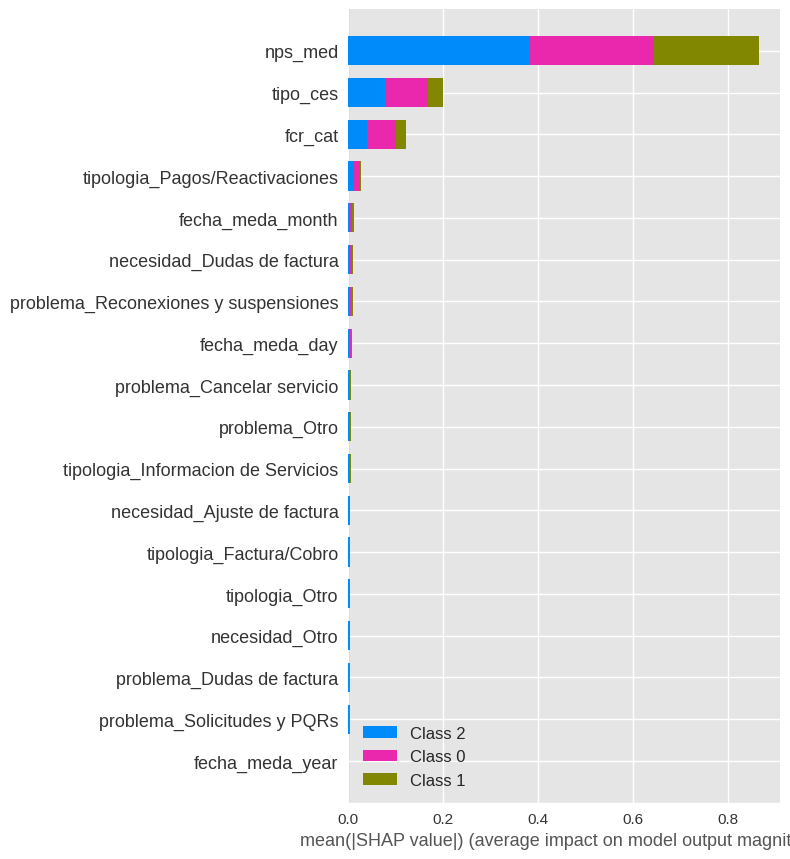

In [ ]:
# 5.2 Interpret Model
# Implemented based on the SHAP (Shapley Additive exPlanations)
# https://shap.readthedocs.io/en/latest/

plt.rcParams['image.cmap'] = 'viridis'
nps_multiclass.interpret_model(best_model[1], plot = 'summary')

#### VI. Predictions

In [ ]:
# 6. Predictions

# Model 1: Decision Tree Classifier
# Model 2: Random Forest Classifier
# Model 3: Ada Boost Classifier

# 6.1 Model's hyperparameters
print(best_model[1])
print("\n")

# 6.2 Testing dataset
test_data = pd.concat([nps_multiclass.get_config("X_test")]) \
              .loc[:, list(nps_multiclass.get_config("X_train").columns)]

# 6.3 Calculate predictions
nps_multiclass.predict_model(best_model[1],
                             data = test_data,
                             raw_score = True)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)




fecha_meda      grupo_meda  nps_med fcr_cat  esfuerzo  \
id                                                           
4349 2022-01-21  Whatsapp Hogar        1      No         1   
3002 2021-12-10  Whatsapp Hogar        8      Sí         9   
5409 2022-02-16  Whatsapp Hogar        8      Sí         8   
873  2021-10-19  Whatsapp Hogar        0      Sí         5   
2140 2021-11-21  Whatsapp Hogar        6      Sí         9   
...         ...             ...      ...     ...       ...   
6433 2022-03-27             NaN       10      Sí        10   
2924 2021-12-09  Whatsapp Hogar        9      Sí         8   
3781 2021-12-28  Whatsapp Hogar       10      Sí        10   
5398 2022-02-16  Whatsapp Hogar       10      Sí         9   
5878 2022-03-07             NaN        8      Sí         9   

      satisfaccion_asesor  satisfaccion_general             tipo_ces  \
id                                                                     
4349                  1.0                   1.0          Muy Difícil   
3002                 10.0                   4.0            Muy Fácil   
5409                  8.0                   4.0  Ni Fácil ni Difícil   
873                   5.0                   4.0          Muy Difícil   
2140                 10.0                   4.0            Muy Fácil   
...                   ...                   ...                  ...   
6433                  NaN                   5.0            Muy Fácil   
2924                  9.0                   5.0  Ni Fácil ni Difícil   
3781                 10.0                   5.0            Muy Fácil   
5398                  9.0                   5.0            Muy Fácil   
5878                  NaN                   4.0            Muy Fácil   

                   tipo_satu_asesor tipo_satu_general  \
id                                                      
4349                   Insatisfecho  Muy Insatisfecho   
3002                     Satisfecho        Satisfecho   
5409                     Satisfecho        Satisfecho   
873   Ni Satisfecho Ni Insatisfecho        Satisfecho   
2140                     Satisfecho        Satisfecho   
...                             ...               ...   
6433                            NaN    Muy Satisfecho   
2924                     Satisfecho    Muy Satisfecho   
3781                     Satisfecho    Muy Satisfecho   
5398                     Satisfecho    Muy Satisfecho   
5878                            NaN        Satisfecho   

                         problema                   necesidad  \
id                                                              
4349           Solicitudes y PQRs            Dudas de factura   
3002             Dudas de factura            Dudas de factura   
5409            Cancelar servicio         Validar cancelación   
873            Solicitudes y PQRs  Modificaciones en servicio   
2140           Solicitudes y PQRs            Dudas de factura   
...                           ...                         ...   
6433            Cancelar servicio           Retiro definitivo   
2924  Reconexiones y suspensiones            Dudas de factura   
3781            Cancelar servicio          Solicitudes y PQRs   
5398           Solicitudes y PQRs            Dudas de factura   
5878      Problemas pago en línea           Ajuste de factura   

                        tipologia prediction_label  \
id                                                   
4349          Atencion Al Cliente      Detractores   
3002     Informacion de Servicios          Neutros   
5409          Atencion Al Cliente          Neutros   
873                 Factura/Cobro      Detractores   
2140                Factura/Cobro      Detractores   
...                           ...              ...   
6433       Visita Tecnica/Averias       Promotores   
2924                Factura/Cobro       Promotores   
3781  Aplicaciones de Autogestion       Promotores   
5398                Factura/Cobro       Promotores   
5878                Factu

#### VII. Hyperparameters tuning

In [ ]:
# 7. Hyperparameters tuning

# 7.1 RandomForestClassifier
tuned_rf = nps_multiclass.tune_model(estimator = best_model[1],
                                     optimize = "F1",
                                     search_library = "scikit-optimize",
                                     search_algorithm = "bayesian")
print("\n")
print(tuned_rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# 7.2 AdaBoostClassifier
tuned_ada = nps_multiclass.tune_model(estimator = best_model[2],
                                      optimize = "F1",
                                      search_library = "scikit-optimize",
                                      search_algorithm = "bayesian")
print("\n")
print(tuned_ada)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


#### VIII. Save models

In [ ]:
# 8. Save models
# Create pickle file

# 8.1 RandomForestClassifier
nps_multiclass.save_model(model = tuned_rf, model_name = 'RandomForestClassifier_model_nps')

# 8.2 AdaBoostClassifier
nps_multiclass.save_model(model = tuned_ada, model_name = 'AdaBoostClassifier_model_nps')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['fecha_meda'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('iterative_imputer',
                  TransformerWrapper...
                                                                  standardize=False))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=RobustScaler(copy=True,
                           

#### IX. Load models

In [ ]:
# 9. Load the model back in environment

rf = load_model('RandomForestClassifier_model_nps')
ada = load_model('AdaBoostClassifier_model_nps')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [ ]:
ada

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['fecha_meda'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('iterative_imputer',
                 TransformerWrapper...
                                                                 standardize=False))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=RobustScaler(copy=True,
                                                             quantile_range=(25.0,
                                                                             75.0),
                                                             unit_variance=False,
                                                             with_centering=True,
                                                             with_scaling=True))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

#### X. Save / Load Experiment

In [ ]:
# 10.1 Save experiment
nps_multiclass.save_experiment("nps_multiclass_experiment")

In [ ]:
# 10. 2 Load experiment from disk
nps_multiclass2 = load_experiment(path_or_file = 'nps_multiclass_experiment',
                                  data = data_pycaret) # From step 1

### Sklearn

#### I. Data

In [8]:
# 1. Data

%%time
data_sklearn = pd.read_excel("Encuesta_Indicadores.xlsx",
                             sheet_name = 0,
                             index_col = "id",
                             parse_dates = True) \
                 .pipe(clean_names) \
                 .pipe(remove_empty) \
                 .pipe(dtype_conversion) # Types conversion Dataset


# Final conversions
# problema, necesidad and tipología variables do not exhibit cardinality problems
data_sklearn = data_sklearn.astype({"problema": "category",
                                    "necesidad": "category",
                                    "tipologia": "category",
                                    "id_asesor": "category",
                                    "fecha_meda": "datetime64[ns]"})

print(Fore.GREEN + "Final dtypes" + Style.RESET_ALL)
print(data_sklearn.dtypes)

Input dtypes
fecha_meda               object
grupo_meda               object
nps_med                   int64
fcr_cat                  object
esfuerzo                  int64
satisfaccion_asesor     float64
satisfaccion_general    float64
tipo_nps                 object
tipo_ces                 object
tipo_satu_asesor         object
tipo_satu_general        object
ticket_status            object
problema                 object
necesidad                object
tipologia                object
id_asesor                object
dtype: object


High Cardinality: levels > 15
Look at: fecha_meda, 180 levels = ['2021-12-28', '2021-11-11', '2021-11-25', '2021-12-22', '2022-01-07', '2021-12-09', '2021-12-27', '2021-11-24', '2021-11-20', '2021-12-06', '2021-11-09', '2021-11-10', '2022-02-12', '2021-11-13', '2021-12-14', '2021-12-20', '2021-11-19', '2021-12-24', '2021-10-16', '2022-02-07', '2022-02-10', '2022-02-09', '2022-03-21', '2022-03-24', '2022-02-24', '2022-02-18', '2022-03-02', '2022-03-11', '2

In [9]:
# 1.2 Variables types
# In this point, we can exclude no informative features as "ticket_status", "id_asesor"

# Target feature
target_var = ["tipo_nps"]

# Datetime features
datetime_vars = data_sklearn.select_dtypes(include = "datetime64[ns]").columns.tolist()

# Numerical features
numerical_vars = data_sklearn.select_dtypes(include = "number").columns.tolist()

# Categorical features
ordinal_vars = ["tipo_ces", "tipo_satu_asesor", "tipo_satu_general"]
nominal_vars = ["grupo_meda", "fcr_cat", "problema", "necesidad", "tipologia"]

# 2.2 Reorder DataFrame
new_col_order = target_var + datetime_vars + numerical_vars + ordinal_vars + nominal_vars
data_sklearn = data_sklearn.reindex(columns = new_col_order)

#### II. Train Test Split

In [10]:
# 2. Train - test split

X = data_sklearn.copy(deep = True).drop(["tipo_nps"], axis = 1) # Exclude target variable
y = data_sklearn.copy(deep = True).loc[:, "tipo_nps"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 123456)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5312, 13) (1328, 13) (5312,) (1328,)


#### III Transforming feature target

In [11]:
# 3. Transforming the prediction target in trainin dataset: label enconding

# 3.1 Instantiate Encoder
y_train_encoder = LabelEncoder()

# 3.2 y train encoder
y_train_encoded = y_train_encoder.fit_transform(y_train)
print(y_train_encoder.classes_)
y_train = pd.DataFrame(data = y_train_encoded, columns = ["tipo_nps"])
print(y_train.head())

# 3.3 y test encoder
y_test_encoded = y_train_encoder.transform(y_test)
y_test = pd.DataFrame(data = y_test_encoded, columns = ["tipo_nps"])
print(y_test.head())

['Detractores' 'Neutros' 'Promotores']
   tipo_nps
0         0
1         2
2         2
3         2
4         0
   tipo_nps
0         0
1         2
2         2
3         2
4         2


#### IV Numerical Pipeline

In [12]:
# Pipeline cache
cachedir = mkdtemp()

In [13]:
# 4. Numerical pipeline: transforms apply to numerical variables

# Don't used in this case
numerical_pipeline = make_pipeline(
    # 1. Impute missing values
    IterativeImputer(estimator = BayesianRidge(),
                     max_iter = 10,
                     random_state = 123456)
)

#### V Ordinal Pipeline

In [14]:
# 5. Ordinal pipeline: ordinal encoding

ordinal_pipeline = make_pipeline(
    # 1. Ordinal encoder, if neccesary more steps, aggregate them inside pipeline
    OrdinalEncoder(categories = [["Muy Fácil", "Ni Fácil ni Difícil", "Muy Difícil"],
                                 ["Insatisfecho", "Ni Satisfecho Ni Insatisfecho", "Satisfecho"],
                                 ["Muy Insatisfecho", "Insatisfecho", "Ni Satisfecho Ni Insatisfecho", "Satisfecho", "Muy Satisfecho"]],
                   dtype = 'float',
                   handle_unknown = 'use_encoded_value',
                   unknown_value = np.nan,
                   encoded_missing_value = np.nan),
)

ordinal_pipeline

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['Muy Fácil', 'Ni Fácil ni Difícil',
                                             'Muy Difícil'],
                                            ['Insatisfecho',
                                             'Ni Satisfecho Ni Insatisfecho',
                                             'Satisfecho'],
                                            ['Muy Insatisfecho', 'Insatisfecho',
                                             'Ni Satisfecho Ni Insatisfecho',
                                             'Satisfecho', 'Muy Satisfecho']],
                                dtype='float',
                                handle_unknown='use_encoded_value',
                                unknown_value=nan))])

#### VI Nominal Pipeline

In [15]:
# 6. Nominal pipeline: one-hot-encoding

nominal_pipeline = make_pipeline(
    # 1. Nominal encoder
    OneHotEncoder(categories = "auto",
                  drop = None, # "first", Specifies a methodology to use to drop one of the categories per feature
                  sparse_output = False,
                  dtype = "float", # Desired dtype of output
                  handle_unknown = 'infrequent_if_exist',
                  min_frequency = 0.03,
                  max_categories = 30),

)

nominal_pipeline

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(dtype='float',
                               handle_unknown='infrequent_if_exist',
                               max_categories=30, min_frequency=0.03,
                               sparse_output=False))])

#### VII Categorical Pipeline

In [16]:
# 7. Apply transformers and impute data

# 7.1 Combine ordinal and nominal pipelines
transformations = ColumnTransformer(
    transformers=[("numerical", "passthrough", numerical_vars), # No transformation needed
                  ("ordinal", ordinal_pipeline, ordinal_vars),
                  ("nominal", nominal_pipeline, nominal_vars)],
    #remainder = 'passthrough'
)

# 7.2 Categorical transformations + iterative imputer
categorical_pipeline = make_pipeline(
    # 1 Combine ordinal and nominal pipelines
    transformations,

    # 2. Impute missing values
    IterativeImputer(estimator = BayesianRidge(),
                     max_iter = 5,
                     random_state = 123456),

    # 3. Round to nearest integer
)

categorical_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['nps_med', 'esfuerzo',
                                                   'satisfaccion_asesor',
                                                   'satisfaccion_general']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Muy '
                                                                                               'Fácil',
                                                                                               'Ni '
                                                                                               'Fácil '
                                                                                               'ni '
                                                                                               'Difícil',
                                                                                               'Muy '
                                                                                               'Difícil'],
                                                                                              ['Insatisfecho',
                                                                                               'Ni '
                                                                                               'Satisfecho '
                                                                                               'Ni '
                                                                                               'Insatisfecho',
                                                                                               'Satisf...
                                                   'tipo_satu_general']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(dtype='float',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 max_categories=30,
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  ['grupo_meda', 'fcr_cat',
                                                   'problema', 'necesidad',
                                                   'tipologia'])])),
                ('iterativeimputer',
                 IterativeImputer(estimator=BayesianRidge(), max_iter=5,
                                  random_state=123456))])

In [17]:
# 7.3 Apply transformations
X_train_transf = categorical_pipeline.fit_transform(X_train.drop(["fecha_meda"], axis = 1))

In [18]:
# 7.4 Transformations results

# Columns names
X_train_transf_colnames = [i[i.find("_") + 2:] for i in categorical_pipeline.get_feature_names_out().tolist()]

# Create DataFrame
X_train_transf = pd.DataFrame(data = X_train_transf,
                              columns = X_train_transf_colnames)

print(X_train_transf.head(9).to_markdown())

|    |   nps_med |   esfuerzo |   satisfaccion_asesor |   satisfaccion_general |   tipo_ces |   tipo_satu_asesor |   tipo_satu_general |   grupo_meda_Whatsapp Hogar |   grupo_meda_nan |   grupo_meda_infrequent_sklearn |   fcr_cat_No |   fcr_cat_Sí |   problema_Cancelar servicio |   problema_Cobros de servicio adicional |   problema_Detalles y cambio en facturación |   problema_Dudas de factura |   problema_Fallas en servicio |   problema_Inconformidad con cobros |   problema_Reconexiones y suspensiones |   problema_Solicitudes y PQRs |   problema_infrequent_sklearn |   necesidad_Activación de servicios |   necesidad_Ajuste de factura |   necesidad_Dudas de factura |   necesidad_Modificaciones en servicio |   necesidad_Retiro definitivo |   necesidad_Solicitudes y PQRs |   necesidad_infrequent_sklearn |   tipologia_Atencion Al Cliente |   tipologia_Factura/Cobro |   tipologia_Informacion de Servicios |   tipologia_Instalacion Nueva |   tipologia_Internet Fijo HFC |   tipologia_Modificar

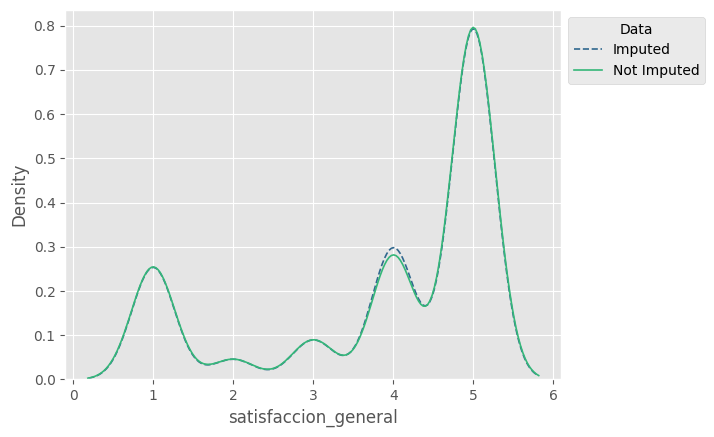

In [19]:
# 7.5 Comparing imputed data

feature = "satisfaccion_general"
sns.set_palette(palette = "viridis", n_colors = 2) # Viridis pallete

sns.kdeplot(x= X_train_transf.loc[:, feature].round(),
            label = "Imputed",
            linestyle = '--',
            linewidth = 1.2,
            palette = sns.color_palette(palette = "viridis")) # Viridis pallete)

sns.kdeplot(x= X_train.loc[:, feature],
            label = "Not Imputed",
            linewidth = 1.2)

plt.legend(title = 'Data',
           loc = 'best',
           bbox_to_anchor=(1, 1))

plt.show()


#### VIII Full pipeline

In [20]:
# 8. Full pipeline

full_pipeline = make_pipeline(
    # 1. Numerical and categorical (nominal + ordinal) transformers
    categorical_pipeline,

    # 2. Feature selector that removes all low-variance features
    VarianceThreshold(threshold = 0.1),

    # 3. Scale features
    RobustScaler(with_centering = True,
                 with_scaling = True,
                 quantile_range = (25.0, 75.0),
                 copy = True,
                 unit_variance = False),

    # 4. Transform features
    PowerTransformer(method = 'yeo-johnson',
                     standardize = True,
                     copy = True),

    # 5. Classifier
    xgb.XGBClassifier(),

    # 6. Memory cache
    memory = cachedir
)

full_pipeline

Pipeline(memory='/tmp/tmpvg18i71s',
         steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['nps_med',
                                                                    'esfuerzo',
                                                                    'satisfaccion_asesor',
                                                                    'satisfaccion_general']),
                                                                  ('ordinal',
                                                                   Pipeline(steps=[('ordinalencoder',
                                                                                    OrdinalEncoder(categories=[['Muy '
                                                                                                                'Fácil',
                                                                                                                'Ni '
                                                                                                                'Fácil '
                                                                                                                'ni '
                                                                                                                'Difícil',
                                                                                                                'Muy '
                                                                                                                'Difícil'],
                                                                                                               ['In...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

#### IX Fit the model

In [21]:
#Fit the model.
#Fit all the transformers one after the other and transform the data. Finally, fit the transformed data using the final estimator.

full_pipeline.fit(X_train.drop(["fecha_meda"], axis = 1), y_train)


Pipeline(memory='/tmp/tmpvg18i71s',
         steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['nps_med',
                                                                    'esfuerzo',
                                                                    'satisfaccion_asesor',
                                                                    'satisfaccion_general']),
                                                                  ('ordinal',
                                                                   Pipeline(steps=[('ordinalencoder',
                                                                                    OrdinalEncoder(categories=[['Muy '
                                                                                                                'Fácil',
                                                                                                                'Ni '
                                                                                                                'Fácil '
                                                                                                                'ni '
                                                                                                                'Difícil',
                                                                                                                'Muy '
                                                                                                                'Difícil'],
                                                                                                               ['In...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [255]:
# Remove the cache directory at the end of your script
rmtree(cachedir)

#### X Use fitted pipeline

In [31]:
# Transform the data, and apply predict with the final estimator.

# Call transform of each transformer in the pipeline.
# The transformed data are finally passed to the final estimator that calls predict method.
# Only valid if the final estimator implements predict.

# Raw Predictions
y_test_pred_raw = pd.DataFrame(y_train_encoder.inverse_transform(full_pipeline.predict(X_test)),
                               columns = ["tipo_nps_pred"])

# Probability predictions
y_test_pred_prob = pd.DataFrame(full_pipeline.predict_proba(X_test), columns = y_train_encoder.classes_).round(2)

# Original clasification
y_test_original = pd.DataFrame(y_train_encoder.inverse_transform(y_test),
                               columns = ["tipo_nps"])

X_test_original = X_test.reset_index(drop = True)

predictions = pd.concat([X_test_original,
                         y_test_original,
                         y_test_pred_raw,
                         y_test_pred_prob],
                        axis = 1)

predictions.head()

fecha_meda  nps_med  esfuerzo  satisfaccion_asesor  satisfaccion_general  \
0 2022-02-05        6         2                  8.0                   4.0   
1 2022-03-28       10        10                  NaN                   5.0   
2 2022-03-27        9        10                  NaN                   5.0   
3 2021-12-20       10         6                  6.0                   4.0   
4 2022-01-18        9         8                  9.0                   4.0   

              tipo_ces               tipo_satu_asesor tipo_satu_general  \
0          Muy Difícil                     Satisfecho        Satisfecho   
1            Muy Fácil                            NaN    Muy Satisfecho   
2            Muy Fácil                            NaN    Muy Satisfecho   
3          Muy Difícil  Ni Satisfecho Ni Insatisfecho        Satisfecho   
4  Ni Fácil ni Difícil                     Satisfecho        Satisfecho   

       grupo_meda fcr_cat                     problema  \
0  Whatsapp Hogar      No           Solicitudes y PQRs   
1             NaN      Sí  Reconexiones y suspensiones   
2             NaN      Sí            Cancelar servicio   
3  Whatsapp Hogar      Sí      Instalación de servicio   
4  Whatsapp Hogar      Sí  Reconexiones y suspensiones   

                              necesidad               tipologia     tipo_nps  \
0               Activación de servicios       Internet Fijo HFC  Detractores   
1                     Ajuste de factura  Visita Tecnica/Averias   Promotores   
2                    Entrega de equipos    Pagos/Reactivaciones   Promotores   
3  Saber cuando le hacen la instalación       Internet Fijo HFC   Promotores   
4           Reconexiones y suspensiones    Pagos/Reactivaciones   Promotores   

  tipo_nps_pred  Detractores  Neutros  Promotores  
0   Detractores          1.0      0.0         0.0  
1    Promotores          0.0      0.0         1.0  
2    Promotores          0.0      0.0         1.0  
3    Promotores          0.0      0.0         1.0  
4    Promotores          0.0      0.0         1.0